**Loading data**

In [1]:
!pip install -r requirements.txt

  Using cached matplotlib-3.4.3-cp38-cp38-manylinux1_x86_64.whl (10.3 MB)
  Using cached scipy-1.7.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (28.4 MB)
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached statsmodels-0.12.2-cp38-cp38-manylinux1_x86_64.whl (9.4 MB)
  Using cached scikit_learn-0.24.2-cp38-cp38-manylinux2010_x86_64.whl (24.9 MB)
  Using cached nltk-3.6.2-py3-none-any.whl (1.5 MB)
  Using cached scikit_surprise-1.1.1-cp38-cp38-linux_x86_64.whl
  Using cached wordcloud-1.8.1-cp38-cp38-manylinux1_x86_64.whl (371 kB)
     |████████████████████████████████| 24.0 MB 97 kB/s  eta 0:00:01    |███▋                            | 2.7 MB 3.4 MB/s eta 0:00:07��███           | 15.8 MB 1.2 MB/s eta 0:00:07:00:06
  Using cached smart_open-5.2.1-py3-none-any.whl (58 kB)
  Using cached Pillow-8.3.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (3.0 MB)
  Using cached kiwisolver-1.3.2-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)
  Using c

In [2]:
# Silent warnings
import warnings
warnings.filterwarnings("ignore")

# Core
import numpy as np
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pylab

# Data
import pandas as pd
from sklearn import tree
from sklearn import metrics
from sklearn import neighbors
from sklearn import ensemble


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk # imports the natural language toolkit
nltk.download('punkt')

data = pd.read_csv('data2/encuestas_consolidado.csv')
outlet = pd.read_csv('data2/Outlets_v1.csv', delimiter =';')
o_store = pd.read_csv('data2/evalua tu experiencia de compra en tienda virtual OFFCORSS5.csv.csv')
p_store = pd.read_csv('data2/Evalúa tu experiencia de compra en tiendas OFFCORSS (respuestas) - Respuestas de formulario 1.csv', delimiter =';')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# VOICEBOTS

**PRE-PROCESING**

In [4]:
print("Shape: \n", data.shape,"\n") # Shape
print("Columns: \n",data.columns,"\n") # Columns
print("Dataset info: \n")
print(data.info(),"\n") # Dataset_info
print("Columns with null values: \n")
print(data.isnull().any(),"\n") # Columns with null values
print("Data per QUEUE \n")
#print(data.groupby(by=["QUEUE NAME"]).size().sort_values(ascending=False),"\n") # Data per QUEUE
print("Sample data: \n")
data.head() # Sample data

Shape: 
 (5005, 12) 

Columns: 
 Index(['Unnamed: 0', 'ID AGENT', 'QUEUE', 'QUEUE NAME', 'DATE', 'ID CALL',
       'Q01', 'Q02', 'Q03', 'Q04', 'Q05', 'Q10;'],
      dtype='object') 

Dataset info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5005 entries, 0 to 5004
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5005 non-null   object
 1   ID AGENT    4699 non-null   object
 2   QUEUE       4699 non-null   object
 3   QUEUE NAME  4697 non-null   object
 4   DATE        4697 non-null   object
 5   ID CALL     4697 non-null   object
 6   Q01         4697 non-null   object
 7   Q02         4697 non-null   object
 8   Q03         4697 non-null   object
 9   Q04         4697 non-null   object
 10  Q05         4697 non-null   object
 11  Q10;        4697 non-null   object
dtypes: object(12)
memory usage: 469.3+ KB
None 

Columns with null values: 

Unnamed: 0    False
ID AGENT       True
QUEUE          T

Unnamed: 0 ID AGENT   QUEUE   QUEUE NAME                 DATE  \
0       4670    12713  4109.0     CHAT-SAC  2020-10-31 12:09:20   
1       4671    12713  4109.0     CHAT-SAC  2020-10-31 11:20:20   
2       4672    12348  4058.0  CHAT-VENTAS  2020-10-31 11:13:14   
3       4673        -       -            -  2020-10-31 11:08:31   
4       4674    12348  4058.0  CHAT-VENTAS  2020-10-31 09:45:14   

          ID CALL   Q01   Q02 Q03 Q04 Q05  \
0         4754400   6.0  10.0   -   -   -   
1         4754985  10.0  10.0   -   -   -   
2         4752184  10.0  10.0   -   -   -   
3  offcorss110444  10.0  10.0   -   -   -   
4         4752784   9.0  10.0   -   -   -   

                                                Q10;  
0  Por favor contestar las peticiones con la mayo...  
1            Muchas gracias por su rápida respuesta;  
2                                                 -;  
3                                                 -;  
4                                                 -;

In [5]:
df = data.copy()
df.drop(data[data["ID CALL"].isna()].index, axis=0, inplace = True) # df con las filas correctas
df_corregido = data[data["ID CALL"].isna()]['Unnamed: 0'].str.split(",",expand=True, n=11) # df de filas no convertidas
df_corregido.columns = data.columns # df con el nombre de las columnas correcto
df = df.append(df_corregido).reset_index(drop=True).copy()
#df[df["ID CALL"].isna()]
df["ID CALL"] = df["ID CALL"].str.strip() # Eliminar espacios antes y después del ID_CALL
df["ID CALL"] = df["ID CALL"].str.lstrip("offcorss") # Eliminar del "ID CALL" la palabra ofcorss
df["ID CALL"] = df["ID CALL"].str.lstrip("''") # Eliminar la ' de ID CALL
df["ID CALL"] = df["ID CALL"].str.replace(".","",regex=False) # Eliminar el . de ID CALL
df.drop_duplicates(subset=["ID CALL"], inplace=True) # Eliminar los ID CALL duplicados
#df_1[df_1["ID CALL"].str.find("offcorss")>=0]
#df_1[df_1["ID CALL"].str.isnumeric() == False].head()
df.drop(df[df["ID AGENT"] == "TOTAL"].index, axis=0, inplace = True)  # Eliminar del "ID AGENT" las filas con totales

df.head()

Unnamed: 0 ID AGENT   QUEUE   QUEUE NAME                 DATE  ID CALL  \
0       4670    12713  4109.0     CHAT-SAC  2020-10-31 12:09:20  4754400   
1       4671    12713  4109.0     CHAT-SAC  2020-10-31 11:20:20  4754985   
2       4672    12348  4058.0  CHAT-VENTAS  2020-10-31 11:13:14  4752184   
3       4673        -       -            -  2020-10-31 11:08:31   110444   
4       4674    12348  4058.0  CHAT-VENTAS  2020-10-31 09:45:14  4752784   

    Q01   Q02 Q03 Q04 Q05                                               Q10;  
0   6.0  10.0   -   -   -  Por favor contestar las peticiones con la mayo...  
1  10.0  10.0   -   -   -            Muchas gracias por su rápida respuesta;  
2  10.0  10.0   -   -   -                                                 -;  
3  10.0  10.0   -   -   -                                                 -;  
4   9.0  10.0   -   -   -                                                 -;

**COLUMNS DATETYPES**

In [6]:
df["DATE"] = pd.to_datetime(df["DATE"].astype("datetime64"), format="%Y%m%d")
df["MES"]  = df["DATE"].dt.month
df["MES"] = df["MES"].astype('int32')
#df[df["Q01"].str.isnumeric() == False]
#df["Q01"] == "-"

df["ID CALL"] = pd.to_numeric(df["ID CALL"], errors='coerce', downcast='integer')

df["Q01"] = df["Q01"].replace("-",np.nan)
df["Q01"] = pd.to_numeric(df["Q01"], errors='coerce', downcast='integer') #.fillna("")
df["Q02"] = df["Q02"].replace("-",np.nan)
df["Q02"] = pd.to_numeric(df["Q02"], errors='coerce', downcast='integer') #.fillna("")
df["Q03"] = df["Q03"].replace("-",np.nan)
df["Q03"] = df["Q03"].replace(["1","2","9","No","Si"], [0,0,1,0,1])
df["Q03"] = pd.to_numeric(df["Q03"], errors='coerce', downcast='integer') #.fillna("")
df["Q04"] = df["Q04"].replace("-",np.nan)
df["Q04"] = pd.to_numeric(df["Q04"], errors='coerce', downcast='integer') #.fillna("")
df["Q05"] = df["Q05"].replace("-",np.nan)
df["Q05"] = pd.to_numeric(df["Q05"], errors='coerce', downcast='integer') #.fillna("")
df[df["Q05"].isna()].head()

#df[df["Q01"].str.isnumeric() == False]
#df["Q02"] = df["Q02"].astype('int32')
#df["Q03"] = df["Q03"].astype('int32')
#df["Q04"] = df["Q04"].astype('int32')
#df["Q10;"] = df["Q10;"].astype('int32')

Unnamed: 0 ID AGENT   QUEUE   QUEUE NAME                DATE    ID CALL  \
0       4670    12713  4109.0     CHAT-SAC 2020-10-31 12:09:20  4754400.0   
1       4671    12713  4109.0     CHAT-SAC 2020-10-31 11:20:20  4754985.0   
2       4672    12348  4058.0  CHAT-VENTAS 2020-10-31 11:13:14  4752184.0   
3       4673        -       -            - 2020-10-31 11:08:31   110444.0   
4       4674    12348  4058.0  CHAT-VENTAS 2020-10-31 09:45:14  4752784.0   

    Q01   Q02  Q03  Q04  Q05  \
0   6.0  10.0  NaN  NaN  NaN   
1  10.0  10.0  NaN  NaN  NaN   
2  10.0  10.0  NaN  NaN  NaN   
3  10.0  10.0  NaN  NaN  NaN   
4   9.0  10.0  NaN  NaN  NaN   

                                                Q10;  MES  
0  Por favor contestar las peticiones con la mayo...   10  
1            Muchas gracias por su rápida respuesta;   10  
2                                                 -;   10  
3                                                 -;   10  
4                                                 -;   10

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4040 entries, 0 to 4944
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  4040 non-null   object        
 1   ID AGENT    4040 non-null   object        
 2   QUEUE       4040 non-null   object        
 3   QUEUE NAME  4040 non-null   object        
 4   DATE        4040 non-null   datetime64[ns]
 5   ID CALL     4040 non-null   float64       
 6   Q01         3723 non-null   float64       
 7   Q02         3785 non-null   float64       
 8   Q03         3304 non-null   float64       
 9   Q04         1030 non-null   float64       
 10  Q05         1025 non-null   float64       
 11  Q10;        4040 non-null   object        
 12  MES         4040 non-null   int32         
dtypes: datetime64[ns](1), float64(6), int32(1), object(5)
memory usage: 426.1+ KB


In [8]:
df[["Q03","ID CALL"]].groupby(by=["Q03"]).size()

Q03
0.0     577
1.0    2727
dtype: int64

**COLUMNS CORRECTION FOR MONTHS 10 and 11**

In [9]:
# Mes 10
df["Q01"].mask(df["MES"] == 10, df["Q01"]-1, inplace = True)
df["Q02"].mask(df["MES"] == 10, df["Q02"]-1, inplace = True)
#df["Q03"].mask(df["MES"] == 10, df["Q03"]-1, inplace = True)
df["Q04"].mask(df["MES"] == 10, df["Q04"]-1, inplace = True)
df["Q05"].mask(df["MES"] == 10, df["Q05"]-1, inplace = True)

# Mes 11
df["Q01"].mask(df["MES"] == 11, df["Q01"]-1, inplace = True)
df["Q02"].mask(df["MES"] == 11, df["Q02"]-1, inplace = True)
#df["Q03"].mask(df["MES"] == 11, df["Q03"]-1, inplace = True)
df["Q04"].mask(df["MES"] == 11, df["Q04"]-1, inplace = True)
df["Q05"].mask(df["MES"] == 11, df["Q05"]-1, inplace = True)

In [10]:
df[df["MES"].isin([10,11])].describe()

ID CALL          Q01          Q02         Q03  Q04  Q05  \
count  1.187000e+03  1103.000000  1106.000000  533.000000  0.0  0.0   
mean   3.661454e+25     6.784225     7.150995    0.769231  NaN  NaN   
std    4.268869e+26     2.634864     2.426808    0.421721  NaN  NaN   
min    6.093100e+04     0.000000     0.000000    0.000000  NaN  NaN   
25%    4.437289e+06     5.000000     7.000000    1.000000  NaN  NaN   
50%    4.831524e+06     8.000000     8.000000    1.000000  NaN  NaN   
75%    5.292690e+06     9.000000     9.000000    1.000000  NaN  NaN   
max    5.541522e+27     9.000000     9.000000    1.000000  NaN  NaN   

               MES  
count  1187.000000  
mean     10.558551  
std       0.496769  
min      10.000000  
25%      10.000000  
50%      11.000000  
75%      11.000000  
max      11.000000

**NPS CALC**

In [11]:
df["NPS"] = df["Q02"].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [-1, -1, -1, -1, -1, -1, 0, 0, 1, 1])
df["P"] = df["Q02"].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 0, 0, 0, 0, 0, 0, 0, 1, 1])
df["N"] = df["Q02"].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 0, 0, 0, 0, 0, 1, 1, 0, 0])
df["D"] = df["Q02"].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 1, 1, 1, 1, 1, 0, 0, 0, 0])
df["T"] = df["Q02"].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

print("NPS NAN: ", df[df["NPS"].isna()].shape[0])
print("NPS NOT NAN: ", df[~df["NPS"].isna()].shape[0])
print("Data: ", df[df["NPS"].isna()].shape[0] + df[~df["NPS"].isna()].shape[0])
df[["NPS","ID CALL"]].groupby(by=["NPS"]).size().sort_values(ascending=False)

NPS NAN:  255
NPS NOT NAN:  3785
Data:  4040


NPS
 1.0    3101
-1.0     436
 0.0     248
dtype: int64

In [12]:
df.head()

Unnamed: 0 ID AGENT   QUEUE   QUEUE NAME                DATE    ID CALL  \
0       4670    12713  4109.0     CHAT-SAC 2020-10-31 12:09:20  4754400.0   
1       4671    12713  4109.0     CHAT-SAC 2020-10-31 11:20:20  4754985.0   
2       4672    12348  4058.0  CHAT-VENTAS 2020-10-31 11:13:14  4752184.0   
3       4673        -       -            - 2020-10-31 11:08:31   110444.0   
4       4674    12348  4058.0  CHAT-VENTAS 2020-10-31 09:45:14  4752784.0   

   Q01  Q02  Q03  Q04  Q05                                               Q10;  \
0  5.0  9.0  NaN  NaN  NaN  Por favor contestar las peticiones con la mayo...   
1  9.0  9.0  NaN  NaN  NaN            Muchas gracias por su rápida respuesta;   
2  9.0  9.0  NaN  NaN  NaN                                                 -;   
3  9.0  9.0  NaN  NaN  NaN                                                 -;   
4  8.0  9.0  NaN  NaN  NaN                                                 -;   

   MES  NPS    P    N    D    T  
0   10  1.0  1.0  0.0  0.0  1.0  
1   10  1.0  1.0  0.0  0.0  1.0  
2   10  1.0  1.0  0.0  0.0  1.0  
3   10  1.0  1.0  0.0  0.0  1.0  
4   10  1.0  1.0  0.0  0.0  1.0

In [13]:
df.columns

Index(['Unnamed: 0', 'ID AGENT', 'QUEUE', 'QUEUE NAME', 'DATE', 'ID CALL',
       'Q01', 'Q02', 'Q03', 'Q04', 'Q05', 'Q10;', 'MES', 'NPS', 'P', 'N', 'D',
       'T'],
      dtype='object')

In [14]:
newcolumns_vb = ["id_1", "id_agent","queue","queue_name",
                 "date", "id_call",
                 "shopkeeper_attention",
                 "recommendation",
                 "inconvenient_solved",
                 "repurchase_decision",
                 "overall_satisfaction",
                 "sugestion_description",
                 "MES","NPS","P","N","D","T"]
df_clean = df.copy()
df_clean.columns=newcolumns_vb
df_clean.to_csv("voicebot_cleaned.csv")

In [15]:
df["NPS"].mean()

0.7040951122853368

In [16]:
df_clean.head()

id_1 id_agent   queue   queue_name                date    id_call  \
0  4670    12713  4109.0     CHAT-SAC 2020-10-31 12:09:20  4754400.0   
1  4671    12713  4109.0     CHAT-SAC 2020-10-31 11:20:20  4754985.0   
2  4672    12348  4058.0  CHAT-VENTAS 2020-10-31 11:13:14  4752184.0   
3  4673        -       -            - 2020-10-31 11:08:31   110444.0   
4  4674    12348  4058.0  CHAT-VENTAS 2020-10-31 09:45:14  4752784.0   

   shopkeeper_attention  recommendation  inconvenient_solved  \
0                   5.0             9.0                  NaN   
1                   9.0             9.0                  NaN   
2                   9.0             9.0                  NaN   
3                   9.0             9.0                  NaN   
4                   8.0             9.0                  NaN   

   repurchase_decision  overall_satisfaction  \
0                  NaN                   NaN   
1                  NaN                   NaN   
2                  NaN                   NaN   
3                  NaN                   NaN   
4                  NaN                   NaN   

                               sugestion_description  MES  NPS    P    N    D  \
0  Por favor contestar las peticiones con la mayo...   10  1.0  1.0  0.0  0.0   
1            Muchas gracias por su rápida respuesta;   10  1.0  1.0  0.0  0.0   
2                                                 -;   10  1.0  1.0  0.0  0.0   
3                                                 -;   10  1.0  1.0  0.0  0.0   
4                                                 -;   10  1.0  1.0  0.0  0.0   

     T  
0  1.0  
1  1.0  
2  1.0  
3  1.0  
4  1.0

In [17]:
df[["Q02","ID CALL"]].groupby(by=["Q02"]).size().sort_values(ascending=False)

Q02
9.0    2479
8.0     622
7.0     170
4.0     148
5.0      83
6.0      78
3.0      60
1.0      51
2.0      48
0.0      46
dtype: int64

**CSAT CALC**

In [18]:
df["CSAT"] = df["Q01"].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [-1, -1, -1, -1, -1, -1, 0, 0, 1, 1])
df_clean["CSAT"] = df_clean["shopkeeper_attention"].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [-1, -1, -1, -1, -1, -1, 0, 0, 1, 1])
print("CSAT NAN: ", df[df["CSAT"].isna()].shape[0])
print("CSAT NOT NAN: ", df[~df["CSAT"].isna()].shape[0])
print("Data: ",  df[df["CSAT"].isna()].shape[0] + df[~df["CSAT"].isna()].shape[0])
df[["CSAT","ID CALL"]].groupby(by=["CSAT"]).size().sort_values(ascending=False)

CSAT NAN:  317
CSAT NOT NAN:  3723
Data:  4040


CSAT
 1.0    2907
-1.0     546
 0.0     270
dtype: int64

**PRELIMINARY ANALISIS**

In [19]:
df[["CSAT","NPS","MES"]].groupby(by=["MES"]).mean()

CSAT       NPS
MES                    
1    0.812165  0.817052
2    0.800000  0.852747
3    0.853567  0.865031
10   0.593810  0.701550
11   0.126280  0.310169
12   0.596059  0.670213

In [20]:
view_1 = df[["NPS","MES", "P", "N", "D","T"]].groupby(by=["MES"]).agg({'NPS':'mean','P':'sum','N':'sum','D':'sum','T':'sum'})
view_1

NPS      P     N      D      T
MES                                     
1    0.817052  497.0  29.0   37.0  563.0
2    0.852747  412.0  19.0   24.0  455.0
3    0.865031  744.0  32.0   39.0  815.0
10   0.701550  420.0  38.0   58.0  516.0
11   0.310169  354.0  65.0  171.0  590.0
12   0.670213  674.0  65.0  107.0  846.0

<Figure size 432x288 with 0 Axes>

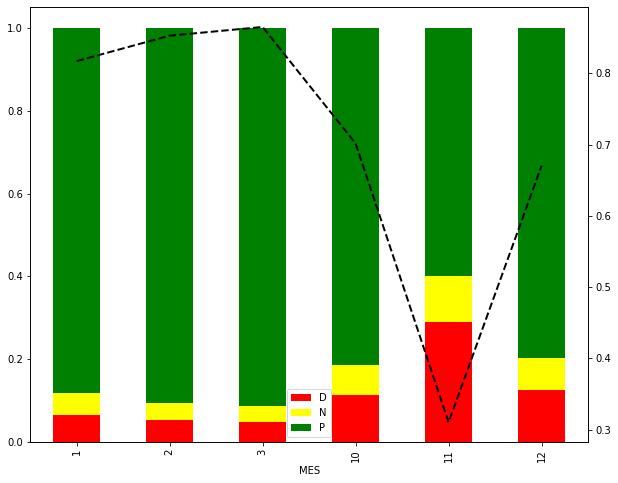

In [21]:
colores = ['red', 'yellow', 'green'] # ['yellow', 'orange', 'blue', 'cyan', 'red', 'gray']
view_1_n = view_1[["P", "N", "D"]].divide(view_1["T"], axis = 0)

fig = plt.figure()
ax = view_1_n[["D", "N", "P"]].plot(kind="bar",stacked=True,figsize=(10,8), color=colores)
ax2 = ax.twinx()
ax2.plot(view_1[["NPS"]].values, linestyle='--', linewidth=2.0,color='black')

plt.show()
#plt.legend(loc="upper left", ncol = 3)

#view_1[["NPS"]].plot(kind="line",figsize=(10,8))
#fig = plt.figure()
#ax = exposicion['claim'].plot(kind='bar',grid=True)
#ax2 = ax.twinx()
#ax2.plot(frecuencia['claim'].values, linestyle='-', linewidth=2.0,color='red')
#plt.show();

In [22]:
view_1["T"]

MES
1     563.0
2     455.0
3     815.0
10    516.0
11    590.0
12    846.0
Name: T, dtype: float64

In [23]:
df[["CSAT","NPS","QUEUE NAME","MES"]].groupby(by=["QUEUE NAME"]).mean()

CSAT       NPS        MES
QUEUE NAME                                             
-                         0.754098  0.765751   4.823620
CHAT-COBRANZAS            0.613333  0.679487   3.000000
CHAT-SAC                  0.553428  0.632603   8.435080
CHAT-VENTAS               0.684883  0.763066   6.270503
INTERES COMERCIAL MANUAL       NaN       NaN  11.000000
PRUEBAS                  -0.600000  0.333333  11.000000

In [24]:
df[['Q01', 'Q02', 'Q03', 'Q04', 'Q05']].describe()

Q01          Q02          Q03          Q04          Q05
count  3723.000000  3785.000000  3304.000000  1030.000000  1025.000000
mean      7.796938     7.999736     0.825363     8.578641     8.480976
std       2.173709     1.974132     0.379714     1.265959     1.425178
min       0.000000     0.000000     0.000000     1.000000     1.000000
25%       8.000000     8.000000     1.000000     9.000000     9.000000
50%       9.000000     9.000000     1.000000     9.000000     9.000000
75%       9.000000     9.000000     1.000000     9.000000     9.000000
max       9.000000     9.000000     1.000000     9.000000     9.000000

The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of box to show the range of the data. By default, they extend no more than 1.5 * IQR (IQR = Q3 - Q1) from the edges of the box, ending at the farthest data point within that interval. Outliers are plotted as separate dots.

<AxesSubplot:>

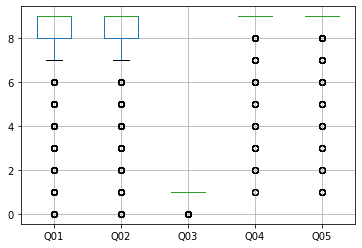

In [25]:
df.boxplot(column=['Q01', 'Q02', 'Q03', 'Q04', 'Q05'])

In [26]:
df[['Q01', 'Q02', 'Q03', 'Q04', 'Q05']].corr()

Q01       Q02       Q03       Q04       Q05
Q01  1.000000  0.791473  0.537881  0.559470  0.632886
Q02  0.791473  1.000000  0.461302  0.723870  0.675088
Q03  0.537881  0.461302  1.000000  0.371086  0.481138
Q04  0.559470  0.723870  0.371086  1.000000  0.812096
Q05  0.632886  0.675088  0.481138  0.812096  1.000000

Q05  1.0  2.0  3.0  4.0  5.0   6.0   7.0   8.0    9.0
Q04                                                  
1.0  5.0  NaN  NaN  NaN  NaN   NaN   NaN   NaN    NaN
2.0  2.0  2.0  NaN  NaN  NaN   NaN   NaN   NaN    1.0
3.0  2.0  2.0  3.0  1.0  NaN   NaN   NaN   NaN    NaN
4.0  1.0  2.0  NaN  6.0  2.0   NaN   1.0   NaN    NaN
5.0  NaN  NaN  NaN  2.0  4.0   NaN   2.0   1.0    3.0
6.0  NaN  NaN  2.0  NaN  2.0   3.0   1.0   1.0    4.0
7.0  NaN  1.0  3.0  NaN  2.0   3.0  14.0   4.0    3.0
8.0  NaN  NaN  NaN  NaN  3.0   NaN   3.0  54.0   15.0
9.0  1.0  NaN  NaN  1.0  4.0  10.0  10.0  43.0  792.0


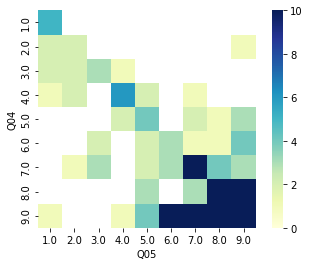

In [27]:
v = pd.pivot_table(df, values ='ID CALL', index='Q04', columns='Q05', aggfunc=np.size)
sns.heatmap(v, vmin=0, vmax=10, cmap="YlGnBu",square=True)
print(v)

Q04  1.0  2.0  3.0  4.0  5.0  6.0  7.0   8.0    9.0
Q01                                                
1.0  3.0  2.0  1.0  NaN  NaN  NaN  1.0   2.0    3.0
2.0  NaN  2.0  2.0  1.0  2.0  1.0  NaN   NaN    2.0
3.0  NaN  NaN  2.0  1.0  1.0  NaN  NaN   1.0    3.0
4.0  NaN  NaN  1.0  1.0  1.0  NaN  NaN   1.0    2.0
5.0  NaN  NaN  NaN  1.0  2.0  1.0  4.0   2.0   15.0
6.0  NaN  NaN  NaN  2.0  NaN  3.0  1.0   5.0    6.0
7.0  NaN  NaN  NaN  2.0  NaN  2.0  6.0   4.0   11.0
8.0  NaN  1.0  NaN  1.0  2.0  1.0  8.0  29.0   56.0
9.0  1.0  1.0  2.0  2.0  4.0  5.0  9.0  30.0  757.0


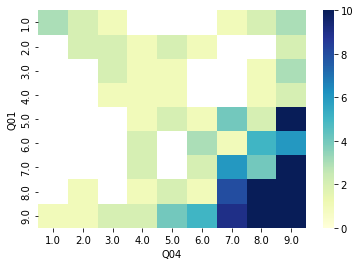

In [28]:
v = pd.pivot_table(df, values ='ID CALL', index='Q01', columns='Q04', aggfunc=np.size)
sns.heatmap(v, vmin=0, vmax=10,  xticklabels=1, yticklabels=1, cmap="YlGnBu")
print(v)

**PRELIMINARY ANALISIS**

Splitting data reviews

In [29]:
OnlyReviews_NPS = df['Q10;']
OnlyGoodReviews_NPS = df[df["Q02"]>7]['Q10;']
OnlyBadReviews_NPS = df[df["Q02"]<6]['Q10;']
options_N = [7, 8]
OnlyNeutralReviews_NPS = df[df["Q02"].isin(options_N)]['Q10;']
OnlyGoodReviews_NPS.head()

0    Por favor contestar las peticiones con la mayo...
1              Muchas gracias por su rápida respuesta;
2                                                   -;
3                                                   -;
4                                                   -;
Name: Q10;, dtype: object

Importing stopwords and defining some functions to clean and explore reviews

In [30]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words("spanish"))

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
import re
import string
def remove_noise(review):
    review = review.lower()
    review = re.sub("(@[A-Za-z0–9_]+)","", review)
    review ="".join([char if char not in string.punctuation else " " for char in review])
    review = re.sub(' +', ' ', review) 
    review = re.sub("[0–9]+","", review)
    review = re.sub("[^A-Za-z0–9_. ]+","",review)
 
    return review

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=1,k=1):
    
    vec = CountVectorizer(ngram_range=(k,k),stop_words = stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    common_words = words_freq[:n]
    #for word, freq in common_words:
    #    print(word, freq)
    df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
    titulo = "Top "+str(n)+" words from all reviews"
    df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',  title=titulo)
    
    return words_freq[:n]

In [33]:
OnlyReviews_NPS_cl = OnlyReviews_NPS.apply(lambda k: remove_noise(k))
OnlyGoodReviews_NPS_cl = OnlyGoodReviews_NPS.apply(lambda k: remove_noise(k))
OnlyNeutralReviews_NPS_cl = OnlyNeutralReviews_NPS.apply(lambda k: remove_noise(k))
OnlyBadReviews_NPS_cl = OnlyBadReviews_NPS.apply(lambda k: remove_noise(k))

WordCloud to Good and Bad reviews

In [34]:
def wordcloud(tweets,col,idgraf):
    import matplotlib.pyplot as plt
    from wordcloud import WordCloud
    #Crear la imagen con las palabras más frecuentes
    wordcloud = WordCloud(background_color="white",stopwords=stop_words).generate(" ".join([i for i in tweets[col]])) # ,random_state = 1
    #Preparar la figura
    plt.figure(num=idgraf, figsize=(10,5), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Good Morning Datascience+")

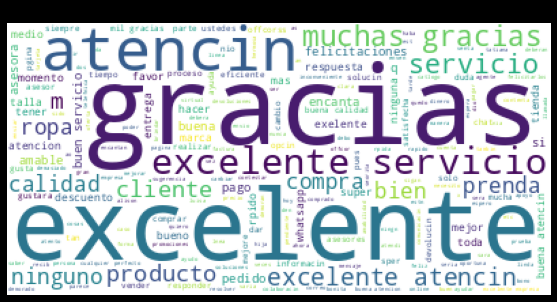

In [35]:
wordcloud(pd.DataFrame(OnlyGoodReviews_NPS_cl),'Q10;',idgraf=1)

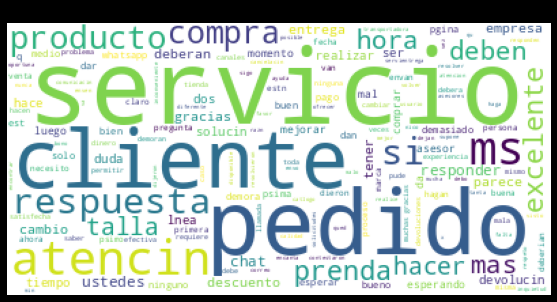

In [36]:
wordcloud(pd.DataFrame(OnlyBadReviews_NPS_cl),'Q10;',idgraf=1)

Top 10 words for Good, Neutral and Bad reviews

[('excelente', 275),
 ('gracias', 244),
 ('servicio', 195),
 ('atencin', 182),
 ('muchas', 81),
 ('buena', 73),
 ('calidad', 53),
 ('productos', 47),
 ('ropa', 43),
 ('ninguno', 43)]

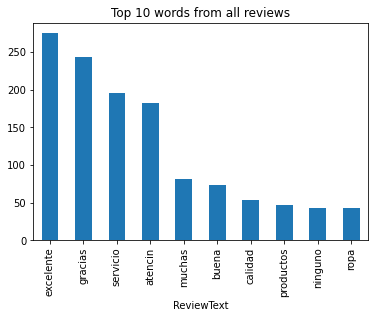

In [37]:
get_top_n_words(OnlyGoodReviews_NPS_cl,10,1)

[('muchas gracias', 12),
 ('excelente servicio', 11),
 ('excelente atencin', 4),
 ('hacer devolucin', 3),
 ('sera bueno', 3),
 ('atencin cliente', 3),
 ('servicio gracias', 3),
 ('gracias atencin', 3),
 ('calidad servicio', 3),
 ('mil gracias', 2)]

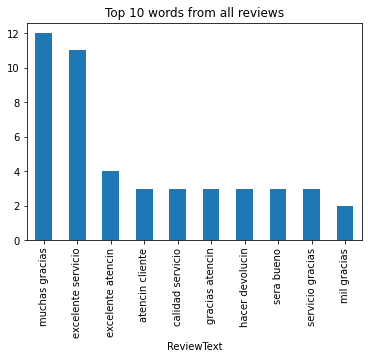

In [38]:
get_top_n_words(OnlyNeutralReviews_NPS_cl,10,2)

[('servicio', 38),
 ('pedido', 22),
 ('atencin', 21),
 ('ms', 20),
 ('cliente', 20),
 ('si', 19),
 ('respuesta', 14),
 ('gracias', 14),
 ('compra', 13),
 ('mas', 12)]

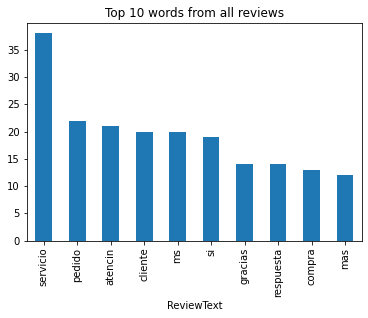

In [39]:
get_top_n_words(OnlyBadReviews_NPS_cl,10,1)

[('excelente servicio', 103),
 ('muchas gracias', 79),
 ('excelente atencin', 67),
 ('buen servicio', 37),
 ('buena atencin', 33),
 ('servicio cliente', 29),
 ('mil gracias', 19),
 ('gracias atencin', 16),
 ('mal servicio', 15),
 ('buena calidad', 14)]

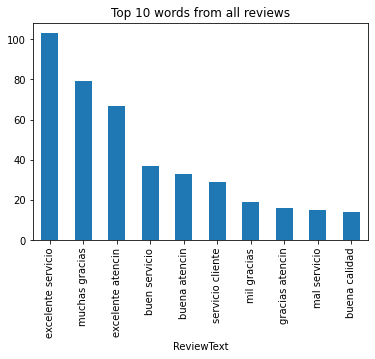

In [40]:
get_top_n_words(OnlyReviews_NPS_cl,10,2)

# Physical Stores


In [41]:
#print(p_store.columns)
#print(p_store.shape)
newcolumns_ps = ["date", "gender","city","age",
                 "to_whom",
                 "product_variety",
                 "product_design",
                 "product_avaliability",
                 "product_quality",
                 "product_price",
                 "product_satisfaction",
                 "shopkeeper_kindness",
                 "shopkeeper_atention",
                 "shopkeeper_interest",
                 "shopkeeper_facility",
                 "shopkeeper_offerings",
                 "shopkeeper_support",
                 "shopkeeper_satisfaction",
                 "store_design",
                 "store_exhibition",
                 "store_information",
                 "store_music",
                 "store_spaces",
                 "store_cloth_testing",
                 "experience_fun",
                 "experience_payment",
                 "experience_warranty",
                 "experience_satisfaction",
                 "inconvenient_before",
                 "inconvenient_description",
                 "inconvenient_solved",
                 "inconvenient_contactability",
                 "inconvenient_time",
                 "inconvenient_kindness",
                 "inconvenient_satisfaction",
                 "Overal_satisfaction",
                 "repurchase_decision",
                 "Overal_recommendation"]
p_store_clean = p_store.copy()
p_store_clean.columns=newcolumns_ps

p_store_clean.head(5)

date     gender      city      age     to_whom  product_variety  \
0  24/02/2021   Femenino    Bogota  36 - 45  Familiares                4   
1   4/03/2021  Masculino     Otros  46 - 55  Familiares                3   
2   4/03/2021   Femenino      Cali  18 - 25  Familiares                5   
3   4/03/2021   Femenino  Medellin  18 - 25  Familiares                1   
4   6/03/2021   Femenino  Medellin  18 - 25  Familiares                5   

   product_design  product_avaliability  product_quality  product_price  ...  \
0               5                     4                5              5  ...   
1               5                     4                5              4  ...   
2               5                     5                5              3  ...   
3               1                     4                5              2  ...   
4               5                     3                5              5  ...   

   inconvenient_before  inconvenient_description  inconvenient_solved  \
0                   No                       NaN                  NaN   
1                   No                       NaN                  NaN   
2                   No                       NaN                  NaN   
3                   No                       NaN                  NaN   
4                   No                       NaN                  NaN   

   inconvenient_contactability  inconvenient_time  inconvenient_kindness  \
0                          NaN                NaN                    NaN   
1                          NaN                NaN                    NaN   
2                          NaN                NaN                    NaN   
3                          NaN                NaN                    NaN   
4                          NaN                NaN                    NaN   

   inconvenient_satisfaction  Overal_satisfaction  repurchase_decision  \
0                        NaN                    9                    9   
1                        NaN                    8                    8   
2                        NaN                   10                   10   
3                        NaN                    5                    8   
4                        NaN                   10                   10   

   Overal_recommendation  
0                      9  
1                      9  
2                     10  
3                      7  
4                     10  

[5 rows x 38 columns]

**MISSING DATA**

In [42]:
print("Shape: \n", p_store_clean.shape,"\n") # Shape
print("Columns: \n",p_store_clean.columns,"\n") # Columns
print("Dataset info: \n")
print(p_store_clean.info(),"\n") # Dataset_info
print("Columns with null values: \n")
print(p_store_clean.isnull().any(),"\n") # Columns with null values
print("Data per QUEUE \n")
#print(df.groupby(by=["QUEUE NAME"]).size().sort_values(ascending=False),"\n") # Data per QUEUE
print("Sample df: \n")
print("Missing data by column \n")
print(p_store_clean.isnull().sum(),"\n")

Shape: 
 (322, 38) 

Columns: 
 Index(['date', 'gender', 'city', 'age', 'to_whom', 'product_variety',
       'product_design', 'product_avaliability', 'product_quality',
       'product_price', 'product_satisfaction', 'shopkeeper_kindness',
       'shopkeeper_atention', 'shopkeeper_interest', 'shopkeeper_facility',
       'shopkeeper_offerings', 'shopkeeper_support', 'shopkeeper_satisfaction',
       'store_design', 'store_exhibition', 'store_information', 'store_music',
       'store_spaces', 'store_cloth_testing', 'experience_fun',
       'experience_payment', 'experience_warranty', 'experience_satisfaction',
       'inconvenient_before', 'inconvenient_description',
       'inconvenient_solved', 'inconvenient_contactability',
       'inconvenient_time', 'inconvenient_kindness',
       'inconvenient_satisfaction', 'Overal_satisfaction',
       'repurchase_decision', 'Overal_recommendation'],
      dtype='object') 

Dataset info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 

**SUMMARY ROWS BY CATEGORY**

<AxesSubplot:>

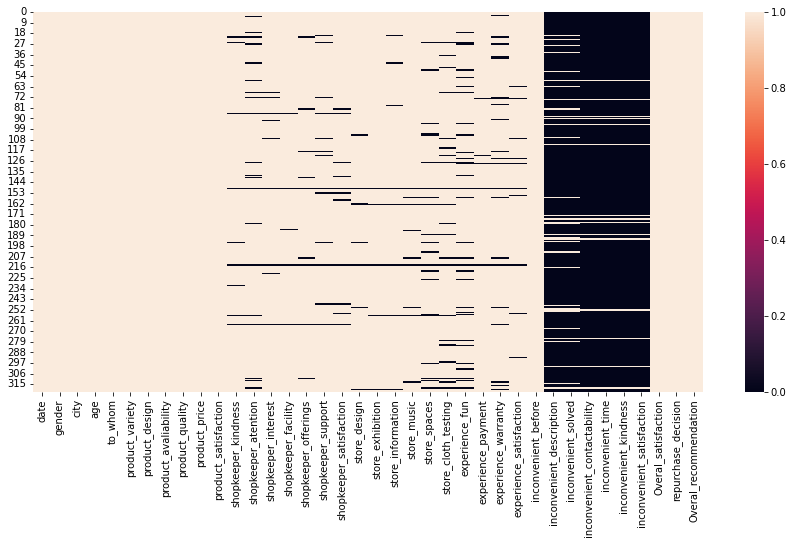

In [43]:
#heat map shows missing information in black
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.heatmap(p_store_clean.notna())
ax

**DATA STATISTICS**

In [44]:
# descriptive statistics 
p_store_clean.describe().transpose().sort_values("mean")

count      mean       std  min  25%  50%   75%  \
inconvenient_satisfaction     15.0  3.066667  1.279881  1.0  2.0  4.0   4.0   
inconvenient_kindness         15.0  3.133333  1.767430  1.0  1.0  4.0   5.0   
inconvenient_time             15.0  3.133333  1.125463  1.0  3.0  3.0   4.0   
experience_fun               291.0  3.353952  1.311150  1.0  3.0  4.0   4.0   
store_spaces                 301.0  3.362126  1.397054  1.0  2.0  4.0   5.0   
inconvenient_contactability   15.0  3.400000  1.454058  1.0  3.0  4.0   4.5   
product_avaliability         322.0  3.574534  1.106074  1.0  3.0  4.0   4.0   
shopkeeper_offerings         313.0  3.715655  1.260460  1.0  3.0  4.0   5.0   
shopkeeper_atention          302.0  3.738411  1.263248  1.0  3.0  4.0   5.0   
shopkeeper_interest          313.0  3.827476  1.185765  1.0  3.0  4.0   5.0   
experience_warranty          301.0  3.833887  1.185600  1.0  3.0  4.0   5.0   
shopkeeper_support           309.0  3.838188  1.221971  1.0  3.0  4.0   5.0   
product_variety              322.0  3.841615  1.153246  1.0  3.0  4.0   5.0   
shopkeeper_facility          317.0  3.848580  1.159348  1.0  3.0  4.0   5.0   
product_price                322.0  3.860248  1.042270  1.0  3.0  4.0   5.0   
store_information            314.0  3.901274  1.060381  1.0  3.0  4.0   5.0   
shopkeeper_satisfaction      311.0  3.909968  1.198762  1.0  3.0  4.0   5.0   
experience_payment           317.0  3.968454  1.110486  1.0  3.0  4.0   5.0   
store_cloth_testing          300.0  3.986667  1.094142  1.0  3.0  4.0   5.0   
store_music                  313.0  4.060703  1.049796  1.0  4.0  4.0   5.0   
experience_satisfaction      312.0  4.064103  1.021817  1.0  4.0  4.0   5.0   
store_design                 314.0  4.092357  1.075908  1.0  3.0  4.0   5.0   
store_exhibition             317.0  4.110410  1.071990  1.0  4.0  4.0   5.0   
product_design               322.0  4.121118  1.011270  1.0  4.0  4.0   5.0   
shopkeeper_kindness          313.0  4.140575  1.106239  1.0  4.0  5.0   5.0   
product_satisfaction         322.0  4.152174  0.994601  1.0  4.0  4.0   5.0   
product_quality              322.0  4.332298  0.863673  1.0  4.0  5.0   5.0   
Overal_satisfaction          322.0  8.372671  1.746630  1.0  8.0  9.0  10.0   
repurchase_decision          322.0  8.816770  1.727719  1.0  8.0  9.0  10.0   
Overal_recommendation        322.0  8.838509  1.723579  0.0  8.0  9.0  10.0   

                              max  
inconvenient_satisfaction     5.0  
inconvenient_kindness         5.0  
inconvenient_time             5.0  
experience_fun                5.0  
store_spaces                  5.0  
inconvenient_contactability   5.0  
product_avaliability          5.0  
shopkeeper_offerings          5.0  
shopkeeper_atention           5.0  
shopkeeper_interest           5.0  
experience_warranty           5.0  
shopkeeper_support            5.0  
product_variety               5.0  
shopkeeper_facility           5.0  
product_price                 5.0  
store_information             5.0  
shopkeeper_satisfaction       5.0  
experience_payment            5.0  
store_cloth_testing           5.0  
store_music                   5.0  
experience_satisfaction       5.0  
store_design                  5.0  
store_exhibition              5.0  
product_design                5.0  
shopkeeper_kindness           5.0  
product_satisfaction          5.0  
product_quality               5.0  
Overal_satisfaction          10.0  
repurchase_decision          10.0  
Overal_recommendation        10.0

<AxesSubplot:xlabel='count', ylabel='mean'>

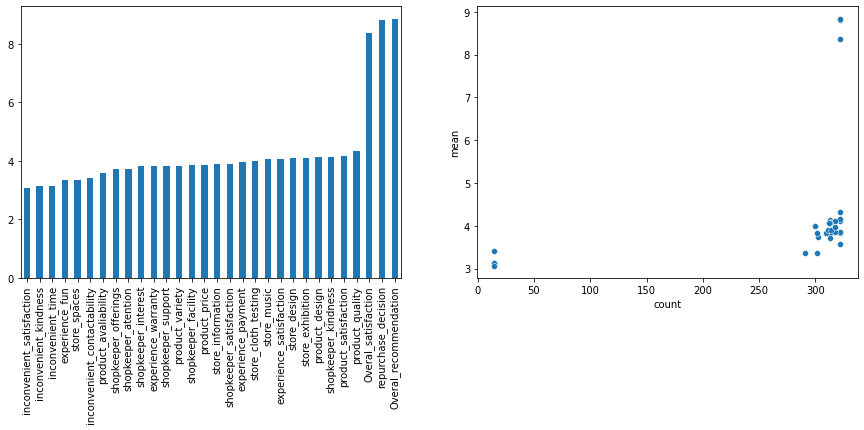

In [45]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
#graph by mean - all variables are measure from 1-5, except last three
pd_desc= p_store_clean.describe().transpose()
#graph by mean - all variables are measure from 1-5, except last three
#dfondesc2=dfondesc1.iloc [  :,1].sort_values()
#dfondesc2
pd_desc.iloc[:,1].sort_values().plot.bar(ax = axs[0])

# most of the low ratings are for questions which are not answered by everyone
sns.scatterplot(data=pd_desc, x="count", y="mean", ax = axs[1])

In [46]:
#correlation matrix
p_store_clean.corr()

product_variety  product_design  \
product_variety                     1.000000        0.780462   
product_design                      0.780462        1.000000   
product_avaliability                0.667468        0.586527   
product_quality                     0.625373        0.617199   
product_price                       0.629465        0.648610   
product_satisfaction                0.697353        0.740449   
shopkeeper_kindness                 0.471441        0.475813   
shopkeeper_atention                 0.540887        0.493240   
shopkeeper_interest                 0.579457        0.547696   
shopkeeper_facility                 0.639748        0.536311   
shopkeeper_offerings                0.469809        0.436668   
shopkeeper_support                  0.537083        0.496740   
shopkeeper_satisfaction             0.552079        0.510692   
store_design                        0.585789        0.639329   
store_exhibition                    0.565098        0.608641   
store_information                   0.553468        0.576873   
store_music                         0.416046        0.503308   
store_spaces                        0.393035        0.414681   
store_cloth_testing                 0.478022        0.454236   
experience_fun                      0.428557        0.386836   
experience_payment                  0.476892        0.438996   
experience_warranty                 0.452301        0.390946   
experience_satisfaction             0.601111        0.604383   
inconvenient_contactability         0.083004       -0.111687   
inconvenient_time                   0.279468       -0.078160   
inconvenient_kindness              -0.008277       -0.049771   
inconvenient_satisfaction           0.251466        0.084591   
Overal_satisfaction                 0.610908        0.582845   
repurchase_decision                 0.562324        0.549428   
Overal_recommendation               0.494885        0.497401   

                             product_avaliability  product_quality  \
product_variety                          0.667468         0.625373   
product_design                           0.586527         0.617199   
product_avaliability                     1.000000         0.477829   
product_quality                          0.477829         1.000000   
product_price                            0.515741         0.698902   
product_satisfaction                     0.591414         0.782315   
shopkeeper_kindness                      0.481346         0.453934   
shopkeeper_atention                      0.523227         0.436206   
shopkeeper_interest                      0.523119         0.469091   
shopkeeper_facility                      0.633881         0.480304   
shopkeeper_offerings                     0.522423         0.405549   
shopkeeper_support                       0.548170         0.381484   
shopkeeper_satisfaction                  0.537200         0.486505   
store_design                             0.466195         0.443556   
store_exhibition                         0.453695         0.420257   
store_information                        0.513503         0.402008   
store_music                              0.304535         0.400571   
store_spaces                             0.408413         0.319807   
store_cloth_testing                      0.481959         0.428712   
experience_fun                           0.412792         0.309537   
experience_payment                       0.373544         0.454640   
experience_warranty                      0.384026         0.442639   
experience_satisfaction                  0.492986         0.531851   
inconvenient_contactability              0.293336         0.167030   
inconvenient_time                        0.573092         0.229284   
inconvenient_kindness                    0.364933         0.403655   
inconvenient_satisfaction                0.495820         0.426961   
Overal_satisfaction                      0.472564         0.485559   
repurchase_dec

**GROUP BY CATEGORY - DATA STRUCTURE**

**- Product**

In [47]:
#dfon_nav=dfon.iloc[:, [4, 5, 6,7,8,9,10,11,12]] 
#dfon_nav.describe()

In [48]:
#dfon.boxplot(column=['navigation','easy_find_products','availability_sizeandcolors','photos','productdescription', 'sizeguideprecision', 'easytomanageshopcar','overallsatisfactionnavigation'], grid=True, rot=90, fontsize=8)
#dfon[['navigation','easy_find_products', 'availability_sizeandcolors', 'photos','productdescription', 'sizeguideprecision', 'easytomanageshopcar','overallsatisfactionnavigation']].corr()

In [49]:
#sns.heatmap(dfon_nav.corr(), cmap="YlGnBu", annot=True, square=True,
#    vmin=0, vmax=1, fmt="+.1f")
#plt.title("Correlations between navigation variables")

In [50]:
#v = pd.pivot_table(dfon, values = 'date', index= 'recommendation', columns='overallsatisfactionnavigation', aggfunc=np.size)
#sns.heatmap(v, vmin=0, vmax=10, cmap="YlGnBu", annot=True, square=True, fmt="+.1f")
#print(v)
#plt.title("Correlations between overallsatisfactionnavigation vs recommendation")

# Online Stores

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as sfm

from matplotlib.widgets import Slider, Button, RadioButtons
from scipy import interp
from scipy.optimize import fsolve
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from statsmodels.formula.api import ols


from IPython.display import display_html

**MEETING THE DATA**

In [52]:
dfon = o_store.copy()
#print("Shape:", dfon.shape) #rows and columns
#dfon.tail(5)

In [53]:
newcolumns1 = ["date", "month", "gender","age","towhom","device","navigation", "easy_find_products","availability_sizeandcolors", "photos", "productdescription","sizeguideprecision","easytomanageshopcar","overallsatisfactionnavigation", "paymentmethods", "personalinformationsafety", "easytofinditemstopay", "dataupdate", "overallpaymentprocess", "deliverystatus", "deliverytime", "physicaldeliveryintegrity", "envelopquality", "completedelivery", "howeasytotrack",
"overallsatisfactionreceivedproduct", "PPchangeneeded", "PPcustomerserviceavailability", "PPrefundandchangepolicy", "PPcustomerserviceattention", "PPcustomerservicesolutions", "PPattentiontimes", "PPissuesinlastmonths", "PPopenquestion-customerissues", "PPissuesolvedornot", "customerserviceeasytocontact", "solutiontime", "PPkindnesscustomerservice", "PPURCHoverallsolution", "satisfaction", "repurchase_decision", "recommendation"]
dfon.columns=newcolumns1
dfon.head(5)

date  month    gender           age  \
0  22/02/2021 16:09:04      2  Femenino  36 a 45 años   
1  22/02/2021 16:09:36      2  Femenino  26 a 35 años   
2  22/02/2021 16:09:47      2  Femenino  36 a 45 años   
3  22/02/2021 16:11:05      2  Femenino  36 a 45 años   
4  22/02/2021 16:11:13      2  Femenino  36 a 45 años   

                           towhom               device  navigation  \
0                     Hijos/Hijas              Celular           1   
1  Hijos/Hijas, Sobrinos/Sobrinas              Celular           5   
2                     Hijos/Hijas           Computador           5   
3                     Hijos/Hijas  Celular, Computador           3   
4                     Hijos/Hijas  Celular, Computador           3   

   easy_find_products  availability_sizeandcolors  photos  ...  \
0                   1                         1.0     1.0  ...   
1                   5                         5.0     5.0  ...   
2                   4                         4.0     5.0  ...   
3                   3                         1.0     2.0  ...   
4                   3                         1.0     2.0  ...   

   PPissuesinlastmonths  PPopenquestion-customerissues  PPissuesolvedornot  \
0                    Sí            Pagos y facturación                  Sí   
1                    No                            NaN                 NaN   
2                    No                            NaN                 NaN   
3                    No                            NaN                 NaN   
4                    No                            NaN                 NaN   

   customerserviceeasytocontact  solutiontime  PPkindnesscustomerservice  \
0                           2.0           2.0                        2.0   
1                           NaN           NaN                        NaN   
2                           NaN           NaN                        NaN   
3                           NaN           NaN                        NaN   
4                           NaN           NaN                        NaN   

   PPURCHoverallsolution  satisfaction  repurchase_decision  recommendation  
0                    2.0             7                    8               8  
1                    NaN             9                   10              10  
2                    NaN             9                    9               9  
3                    NaN             8                    6               9  
4                    NaN             8                    6               9  

[5 rows x 42 columns]

In [54]:
dfon.columns

Index(['date', 'month', 'gender', 'age', 'towhom', 'device', 'navigation',
       'easy_find_products', 'availability_sizeandcolors', 'photos',
       'productdescription', 'sizeguideprecision', 'easytomanageshopcar',
       'overallsatisfactionnavigation', 'paymentmethods',
       'personalinformationsafety', 'easytofinditemstopay', 'dataupdate',
       'overallpaymentprocess', 'deliverystatus', 'deliverytime',
       'physicaldeliveryintegrity', 'envelopquality', 'completedelivery',
       'howeasytotrack', 'overallsatisfactionreceivedproduct',
       'PPchangeneeded', 'PPcustomerserviceavailability',
       'PPrefundandchangepolicy', 'PPcustomerserviceattention',
       'PPcustomerservicesolutions', 'PPattentiontimes',
       'PPissuesinlastmonths', 'PPopenquestion-customerissues',
       'PPissuesolvedornot', 'customerserviceeasytocontact', 'solutiontime',
       'PPkindnesscustomerservice', 'PPURCHoverallsolution', 'satisfaction',
       'repurchase_decision', 'recommendation'],
 

**MISSING DATA**

In [55]:
print("Shape: \n", dfon.shape,"\n") # Shape
print("Columns: \n",dfon.columns,"\n") # Columns
print("Dataset info: \n")
print(dfon.info(),"\n") # Dataset_info
print("Columns with null values: \n")
print(dfon.isnull().any(),"\n") # Columns with null values
print("Data per QUEUE \n")
#print(df.groupby(by=["QUEUE NAME"]).size().sort_values(ascending=False),"\n") # Data per QUEUE
print("Sample df: \n")
print("Missing data by column \n")
print(dfon.isnull().sum(),"\n")

Shape: 
 (391, 42) 

Columns: 
 Index(['date', 'month', 'gender', 'age', 'towhom', 'device', 'navigation',
       'easy_find_products', 'availability_sizeandcolors', 'photos',
       'productdescription', 'sizeguideprecision', 'easytomanageshopcar',
       'overallsatisfactionnavigation', 'paymentmethods',
       'personalinformationsafety', 'easytofinditemstopay', 'dataupdate',
       'overallpaymentprocess', 'deliverystatus', 'deliverytime',
       'physicaldeliveryintegrity', 'envelopquality', 'completedelivery',
       'howeasytotrack', 'overallsatisfactionreceivedproduct',
       'PPchangeneeded', 'PPcustomerserviceavailability',
       'PPrefundandchangepolicy', 'PPcustomerserviceattention',
       'PPcustomerservicesolutions', 'PPattentiontimes',
       'PPissuesinlastmonths', 'PPopenquestion-customerissues',
       'PPissuesolvedornot', 'customerserviceeasytocontact', 'solutiontime',
       'PPkindnesscustomerservice', 'PPURCHoverallsolution', 'satisfaction',
       'repurchase

**SUMMARY ROWS BY CATEGORY**

overallsatisfactionnavigation   
overallpaymentprocess   
overallsatisfactionreceivedproduct
PPURCHoverallsolution 

<AxesSubplot:>

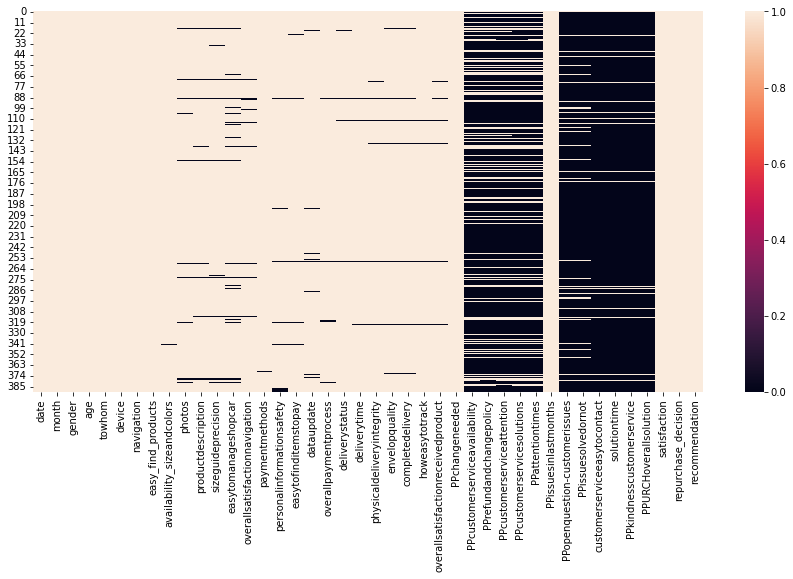

In [56]:
#heat map shows missing information in black
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.heatmap(dfon.notna())
ax

In [57]:
#summary columns by category - filling missing data with mean of this columns
dfon["availability_sizeandcolors"]=dfon.availability_sizeandcolors.fillna(3.46)
dfon["availability_sizeandcolors"]
dfon["overallsatisfactionnavigation"]=dfon.overallsatisfactionnavigation.fillna(4.29)
dfon["overallpaymentprocess"]=dfon.overallpaymentprocess.fillna(4.54)
dfon["overallsatisfactionreceivedproduct"]=dfon.overallsatisfactionreceivedproduct.fillna(4.55)
dfon["PPURCHoverallsolution"]=dfon.PPURCHoverallsolution.fillna(1.12)

**DATA STATISTICS**

In [58]:
# data by month
dfon["month1"] = dfon["month"].replace([2, 3, 4], ["february", "march", "april"])
dfon['month1']

0      february
1      february
2      february
3      february
4      february
         ...   
386       april
387       april
388       april
389       april
390       april
Name: month1, Length: 391, dtype: object

In [59]:
# descriptive statistics 

dfondesc=dfon.describe()
dfondesc

month  navigation  easy_find_products  availability_sizeandcolors  \
count  391.000000  391.000000          391.000000                  391.000000   
mean     2.120205    4.455243            4.363171                    3.466650   
std      0.383474    0.932280            0.979835                    1.224815   
min      2.000000    1.000000            1.000000                    1.000000   
25%      2.000000    4.000000            4.000000                    3.000000   
50%      2.000000    5.000000            5.000000                    3.000000   
75%      2.000000    5.000000            5.000000                    5.000000   
max      4.000000    5.000000            5.000000                    5.000000   

           photos  productdescription  sizeguideprecision  \
count  380.000000          381.000000          380.000000   
mean     4.323684            4.251969            4.223684   
std      0.986969            1.051078            1.108836   
min      1.000000            1.000000            1.000000   
25%      4.000000            4.000000            4.000000   
50%      5.000000            5.000000            5.000000   
75%      5.000000            5.000000            5.000000   
max      5.000000            5.000000            5.000000   

       easytomanageshopcar  overallsatisfactionnavigation  paymentmethods  \
count           370.000000                     391.000000      390.000000   
mean              4.556757                       4.374962        4.633333   
std               0.873128                       0.911161        0.773213   
min               1.000000                       1.000000        1.000000   
25%               4.000000                       4.000000        5.000000   
50%               5.000000                       5.000000        5.000000   
75%               5.000000                       5.000000        5.000000   
max               5.000000                       5.000000        5.000000   

       ...  PPcustomerserviceattention  PPcustomerservicesolutions  \
count  ...                   87.000000                   86.000000   
mean   ...                    3.942529                    3.883721   
std    ...                    1.375503                    1.425966   
min    ...                    1.000000                    1.000000   
25%    ...                    3.000000                    3.000000   
50%    ...                    5.000000                    5.000000   
75%    ...                    5.000000                    5.000000   
max    ...                    5.000000                    5.000000   

       PPattentiontimes  customerserviceeasytocontact  solutiontime  \
count         87.000000                     19.000000     19.000000   
mean           3.942529                      3.578947      3.526316   
std            1.358490                      1.121298      1.389181   
min            1.000000                      1.000000      1.000000   
25%            3.000000                      3.000000      2.500000   
50%            5.000000                      4.000000      4.000000   
75%            5.000000                      4.000000      5.000000   
max            5.000000                      5.000000      5.000000   

       PPkindnesscustomerservice  PPURCHoverallsolution  satisfaction  \
count                   19.00000             391.000000    391.000000   
mean                     4.00000               1.229258      9.112532   
std                      1.20185               0.576920      1.299949   
min                      1.00000               1.000000      1.000000   
25%                      3.00000               1.120000      8.000000   
50%                      4.00000               1.120000     10.000000   
75%                      5.00000               1.120000     10.000000   
max                      5.00000               5.000000     10.000000   

       repurchase_decision  recommendation  
count           391.000000      391.000000  
mean              9

In [60]:
# transpose matrix organized by mean from lowest to highest mean
dfondesc1=dfondesc.transpose()
dfondesc1.sort_values("mean")

count      mean       std  min   25%  \
PPURCHoverallsolution               391.0  1.229258  0.576920  1.0  1.12   
month                               391.0  2.120205  0.383474  2.0  2.00   
availability_sizeandcolors          391.0  3.466650  1.224815  1.0  3.00   
solutiontime                         19.0  3.526316  1.389181  1.0  2.50   
customerserviceeasytocontact         19.0  3.578947  1.121298  1.0  3.00   
PPcustomerserviceavailability        89.0  3.842697  1.421418  1.0  3.00   
PPcustomerservicesolutions           86.0  3.883721  1.425966  1.0  3.00   
PPcustomerserviceattention           87.0  3.942529  1.375503  1.0  3.00   
PPattentiontimes                     87.0  3.942529  1.358490  1.0  3.00   
PPrefundandchangepolicy              87.0  3.965517  1.359277  1.0  3.00   
PPkindnesscustomerservice            19.0  4.000000  1.201850  1.0  3.00   
sizeguideprecision                  380.0  4.223684  1.108836  1.0  4.00   
productdescription                  381.0  4.251969  1.051078  1.0  4.00   
photos                              380.0  4.323684  0.986969  1.0  4.00   
easy_find_products                  391.0  4.363171  0.979835  1.0  4.00   
overallsatisfactionnavigation       391.0  4.374962  0.911161  1.0  4.00   
navigation                          391.0  4.455243  0.932280  1.0  4.00   
deliverystatus                      387.0  4.478036  0.894084  1.0  4.00   
howeasytotrack                      387.0  4.478036  0.896977  1.0  4.00   
dataupdate                          382.0  4.486911  0.895358  1.0  4.00   
deliverytime                        387.0  4.552972  0.823338  1.0  4.00   
easytomanageshopcar                 370.0  4.556757  0.873128  1.0  4.00   
personalinformationsafety           382.0  4.586387  0.814323  1.0  4.25   
overallpaymentprocess               391.0  4.596522  0.804820  1.0  4.54   
envelopquality                      384.0  4.598958  0.855392  1.0  5.00   
overallsatisfactionreceivedproduct  391.0  4.601790  0.791321  1.0  4.55   
easytofinditemstopay                386.0  4.603627  0.799927  1.0  5.00   
physicaldeliveryintegrity           385.0  4.628571  0.766971  1.0  5.00   
paymentmethods                      390.0  4.633333  0.773213  1.0  5.00   
completedelivery                    384.0  4.705729  0.729368  1.0  5.00   
satisfaction                        391.0  9.112532  1.299949  1.0  8.00   
repurchase_decision                 391.0  9.276215  1.414367  1.0  9.00   
recommendation                      391.0  9.291560  1.431121  0.0  9.00   

                                      50%    75%   max  
PPURCHoverallsolution                1.12   1.12   5.0  
month                                2.00   2.00   4.0  
availability_sizeandcolors           3.00   5.00   5.0  
solutiontime                         4.00   5.00   5.0  
customerserviceeasytocontact         4.00   4.00   5.0  
PPcustomerserviceavailability        4.00   5.00   5.0  
PPcustomerservicesolutions           5.00   5.00   5.0  
PPcustomerserviceattention           5.00   5.00   5.0  
PPattentiontimes                     5.00   5.00   5.0  
PPrefundandchangepolicy              5.00   5.00   5.0  
PPkindnesscustomerservice            4.00   5.00   5.0  
sizeguideprecision                   5.00   5.00   5.0  
productdescription                   5.00   5.00   5.0  
photos                               5.00   5.00   5.0  
easy_find_products                   5.00   5.00   5.0  
overallsatisfactionnavigation        5.00   5.00   5.0  
navigation                           5.00   5.00   5.0  
deliverystatus                       5.00   5.00   5.0  
howeasytotrack                       5.00   5.00   5.0  
dataupdate                           5.00   5.00   5.0  
deliverytime                         5.00   5.00   5.0  
easytomanageshopcar                  5.00   5.00   5.0  
personalinformationsafety            5.00   5.00   5.0  
overallpaymentprocess                5.00   5.00   5.0  
envelopquality            

<AxesSubplot:>

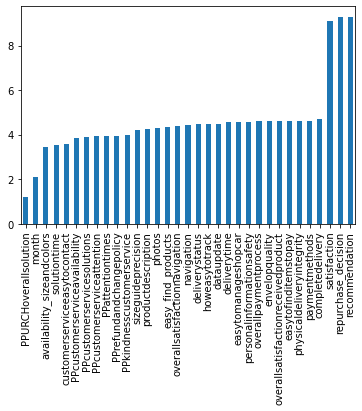

In [61]:
#graph by mean - all variables are measure from 1-5, except last three
dfondesc2=dfondesc1.iloc [  :,1].sort_values()
dfondesc2
dfondesc2.plot.bar()

<AxesSubplot:xlabel='count', ylabel='mean'>

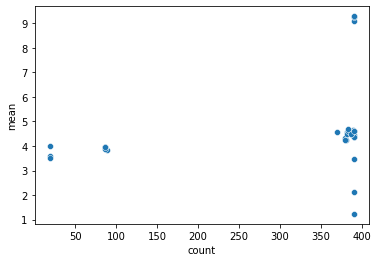

In [62]:
# most of the low ratings are for questions which are not answered by everyone
sns.scatterplot(data=dfondesc1, x="count", y="mean")

In [63]:
#correlation matrix
dfon.corr()

month  navigation  easy_find_products  \
month                               1.000000    0.033018            0.047298   
navigation                          0.033018    1.000000            0.885190   
easy_find_products                  0.047298    0.885190            1.000000   
availability_sizeandcolors          0.044042    0.524098            0.511053   
photos                              0.012347    0.672886            0.688956   
productdescription                 -0.008755    0.670169            0.708598   
sizeguideprecision                  0.038498    0.602789            0.623975   
easytomanageshopcar                 0.028220    0.798241            0.772421   
overallsatisfactionnavigation       0.054134    0.804667            0.809293   
paymentmethods                      0.033710    0.701591            0.694057   
personalinformationsafety           0.001256    0.736560            0.730601   
easytofinditemstopay                0.013718    0.696899            0.705285   
dataupdate                          0.031350    0.723378            0.721920   
overallpaymentprocess               0.029107    0.690235            0.705556   
deliverystatus                      0.026567    0.560105            0.563247   
deliverytime                       -0.008083    0.562161            0.553649   
physicaldeliveryintegrity           0.012812    0.590876            0.585043   
envelopquality                      0.027404    0.644136            0.628038   
completedelivery                    0.005000    0.634983            0.613757   
howeasytotrack                     -0.070978    0.578511            0.571479   
overallsatisfactionreceivedproduct  0.031398    0.570290            0.554730   
PPcustomerserviceavailability      -0.071622    0.497702            0.536105   
PPrefundandchangepolicy             0.098428    0.493822            0.564027   
PPcustomerserviceattention          0.063354    0.521829            0.575940   
PPcustomerservicesolutions          0.109605    0.504026            0.546292   
PPattentiontimes                    0.057011    0.521476            0.569551   
customerserviceeasytocontact       -0.024811    0.717745            0.716231   
solutiontime                       -0.006676    0.708393            0.597437   
PPkindnesscustomerservice           0.146606    0.800973            0.783320   
PPURCHoverallsolution              -0.015938   -0.009954           -0.053500   
satisfaction                       -0.037492    0.346917            0.400640   
repurchase_decision                 0.014267    0.334146            0.371480   
recommendation                      0.010731    0.321141            0.355832   

                                    availability_sizeandcolors    photos  \
month                                                 0.044042  0.012347   
navigation                                            0.524098  0.672886   
easy_find_products                                    0.511053  0.688956   
availability_sizeandcolors                            1.000000  0.569484   
photos                                                0.569484  1.000000   
productdescription                                    0.548676  0.794393   
sizeguideprecision                                    0.513548  0.696544   
easytomanageshopcar                                   0.533946  0.732381   
overallsatisfactionnavigation                         0.590579  0.751669   
paymentmethods                                        0.394342  0.636816   
personalinformationsafety                             0.424955  0.650156   
easytofinditemstopay                                  0.424173  0.660450   
dataupdate                                            0.445627  0.677130   
overallpaymentprocess                                 0.438239  0.640871   
deliverystatus                                        0.405483  0.561149   
deliverytime                                          0.343105  0.524992   
physicaldeliveryintegrity 

**GROUP BY CATEGORY - DATA STRUCTURE**

**- Navigation**

In [64]:
dfon_nav=dfon.iloc[:, [4, 5, 6,7,8,9,10,11,12]] 
dfon_nav.describe()

navigation  easy_find_products  availability_sizeandcolors      photos  \
count  391.000000          391.000000                  391.000000  380.000000   
mean     4.455243            4.363171                    3.466650    4.323684   
std      0.932280            0.979835                    1.224815    0.986969   
min      1.000000            1.000000                    1.000000    1.000000   
25%      4.000000            4.000000                    3.000000    4.000000   
50%      5.000000            5.000000                    3.000000    5.000000   
75%      5.000000            5.000000                    5.000000    5.000000   
max      5.000000            5.000000                    5.000000    5.000000   

       productdescription  sizeguideprecision  easytomanageshopcar  
count          381.000000          380.000000           370.000000  
mean             4.251969            4.223684             4.556757  
std              1.051078            1.108836             0.873128  
min              1.000000            1.000000             1.000000  
25%              4.000000            4.000000             4.000000  
50%              5.000000            5.000000             5.000000  
75%              5.000000            5.000000             5.000000  
max              5.000000            5.000000             5.000000

navigation  easy_find_products  \
navigation                       1.000000            0.885190   
easy_find_products               0.885190            1.000000   
availability_sizeandcolors       0.524098            0.511053   
photos                           0.672886            0.688956   
productdescription               0.670169            0.708598   
sizeguideprecision               0.602789            0.623975   
easytomanageshopcar              0.798241            0.772421   
overallsatisfactionnavigation    0.804667            0.809293   

                               availability_sizeandcolors    photos  \
navigation                                       0.524098  0.672886   
easy_find_products                               0.511053  0.688956   
availability_sizeandcolors                       1.000000  0.569484   
photos                                           0.569484  1.000000   
productdescription                               0.548676  0.794393   
sizeguideprecision                               0.513548  0.696544   
easytomanageshopcar                              0.533946  0.732381   
overallsatisfactionnavigation                    0.590579  0.751669   

                               productdescription  sizeguideprecision  \
navigation                               0.670169            0.602789   
easy_find_products                       0.708598            0.623975   
availability_sizeandcolors               0.548676            0.513548   
photos                                   0.794393            0.696544   
productdescription                       1.000000            0.733514   
sizeguideprecision                       0.733514            1.000000   
easytomanageshopcar                      0.732036            0.737142   
overallsatisfactionnavigation            0.774753            0.731829   

                               easytomanageshopcar  \
navigation                                0.798241   
easy_find_products                        0.772421   
availability_sizeandcolors                0.533946   
photos                                    0.732381   
productdescription                        0.732036   
sizeguideprecision                        0.737142   
easytomanageshopcar                       1.000000   
overallsatisfactionnavigation             0.805697   

                               overallsatisfactionnavigation  
navigation                                          0.804667  
easy_find_products                                  0.809293  
availability_sizeandcolors                          0.590579  
photos                                              0.751669  
productdescription                                  0.774753  
sizeguideprecision                                  0.731829  
easytomanageshopcar                                 0.805697  
overallsatisfactionnavigation                       1.000000

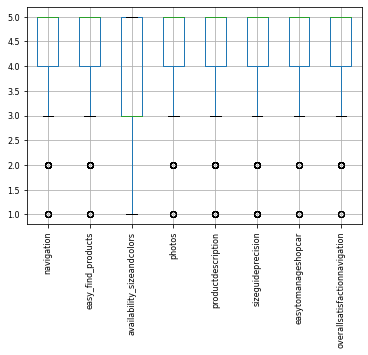

In [65]:
dfon.boxplot(column=['navigation','easy_find_products','availability_sizeandcolors','photos','productdescription', 'sizeguideprecision', 'easytomanageshopcar','overallsatisfactionnavigation'], grid=True, rot=90, fontsize=8)
dfon[['navigation','easy_find_products', 'availability_sizeandcolors', 'photos','productdescription', 'sizeguideprecision', 'easytomanageshopcar','overallsatisfactionnavigation']].corr()

Text(0.5, 1.0, 'Correlations between navigation variables')

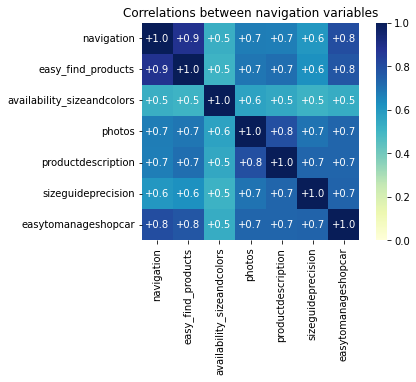

In [66]:
sns.heatmap(dfon_nav.corr(), cmap="YlGnBu", annot=True, square=True,
    vmin=0, vmax=1, fmt="+.1f")
plt.title("Correlations between navigation variables")

overallsatisfactionnavigation  1.00  2.00  3.00  4.00  4.29   5.00
recommendation                                                    
0                               1.0   1.0   1.0   NaN   NaN    NaN
1                               NaN   NaN   NaN   NaN   NaN    1.0
2                               NaN   NaN   1.0   NaN   NaN    NaN
4                               NaN   NaN   NaN   1.0   NaN    NaN
5                               NaN   1.0   1.0   1.0   NaN    NaN
6                               NaN   1.0   2.0   1.0   NaN    NaN
7                               NaN   2.0   3.0   8.0   NaN    5.0
8                               1.0   6.0   6.0  19.0   1.0    4.0
9                               NaN   4.0   7.0  29.0   2.0   23.0
10                              3.0   NaN  21.0  30.0   6.0  198.0


Text(0.5, 1.0, 'Correlations between overallsatisfactionnavigation vs recommendation')

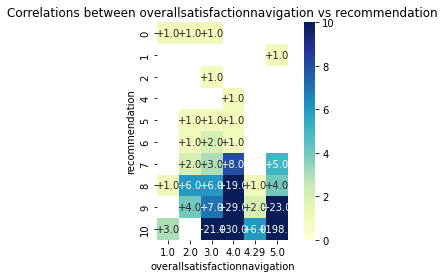

In [67]:
v = pd.pivot_table(dfon, values = 'date', index= 'recommendation', columns='overallsatisfactionnavigation', aggfunc=np.size)
sns.heatmap(v, vmin=0, vmax=10, cmap="YlGnBu", annot=True, square=True, fmt="+.1f")
print(v)
plt.title("Correlations between overallsatisfactionnavigation vs recommendation")

**- Payment**

In [68]:
dfon_pay=dfon.iloc[:, [13,14,15,16,17]] 
dfon_pay. head(5)

overallsatisfactionnavigation  paymentmethods  personalinformationsafety  \
0                            1.0             3.0                        2.0   
1                            5.0             5.0                        5.0   
2                            4.0             5.0                        5.0   
3                            3.0             3.0                        3.0   
4                            3.0             3.0                        3.0   

   easytofinditemstopay  dataupdate  
0                   5.0         1.0  
1                   5.0         5.0  
2                   5.0         5.0  
3                   3.0         3.0  
4                   3.0         3.0

paymentmethods  personalinformationsafety  \
paymentmethods                   1.000000                   0.851147   
personalinformationsafety        0.851147                   1.000000   
easytofinditemstopay             0.871249                   0.877736   
overallpaymentprocess            0.852701                   0.866478   

                           easytofinditemstopay  overallpaymentprocess  
paymentmethods                         0.871249               0.852701  
personalinformationsafety              0.877736               0.866478  
easytofinditemstopay                   1.000000               0.897298  
overallpaymentprocess                  0.897298               1.000000

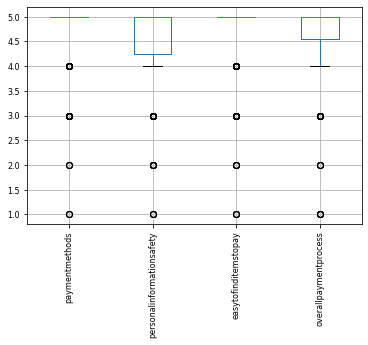

In [69]:
dfon.boxplot(column=["paymentmethods", "personalinformationsafety", "easytofinditemstopay", "overallpaymentprocess"],grid=True, rot=90, fontsize=8)
dfon[["paymentmethods", "personalinformationsafety", "easytofinditemstopay", "overallpaymentprocess"]].corr()

<AxesSubplot:>

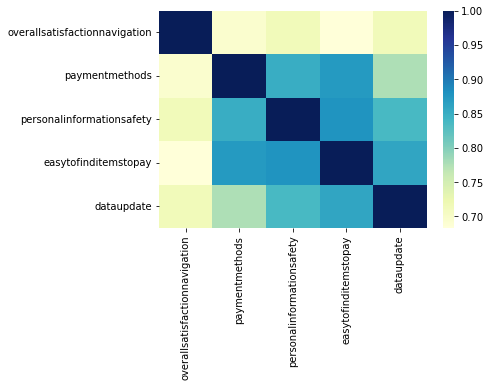

In [70]:
sns.heatmap(dfon_pay.corr(), cmap="YlGnBu")

overallpaymentprocess  1.00  2.00  3.00  4.00  4.54   5.00
recommendation                                            
0                       1.0   NaN   2.0   NaN   NaN    NaN
1                       NaN   NaN   1.0   NaN   NaN    NaN
2                       NaN   NaN   NaN   1.0   NaN    NaN
4                       NaN   NaN   NaN   NaN   NaN    1.0
5                       NaN   NaN   1.0   2.0   NaN    NaN
6                       NaN   NaN   2.0   NaN   NaN    2.0
7                       NaN   1.0   2.0   8.0   NaN    7.0
8                       NaN   1.0   5.0  13.0   NaN   18.0
9                       1.0   2.0   6.0  10.0   NaN   46.0
10                      3.0   NaN  19.0  13.0   6.0  217.0


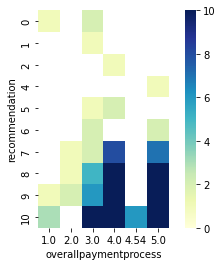

In [71]:
v = pd.pivot_table(dfon, values = 'date', index= 'recommendation', columns='overallpaymentprocess', aggfunc=np.size)
sns.heatmap(v, vmin=0, vmax=10, cmap="YlGnBu",square=True)
print(v)

**- Delivery**

In [72]:
dfon_deliv=dfon.iloc[:, [18,19,20,21,22,23,24]] 
dfon_deliv.describe()

overallpaymentprocess  deliverystatus  deliverytime  \
count             391.000000      387.000000    387.000000   
mean                4.596522        4.478036      4.552972   
std                 0.804820        0.894084      0.823338   
min                 1.000000        1.000000      1.000000   
25%                 4.540000        4.000000      4.000000   
50%                 5.000000        5.000000      5.000000   
75%                 5.000000        5.000000      5.000000   
max                 5.000000        5.000000      5.000000   

       physicaldeliveryintegrity  envelopquality  completedelivery  \
count                 385.000000      384.000000        384.000000   
mean                    4.628571        4.598958          4.705729   
std                     0.766971        0.855392          0.729368   
min                     1.000000        1.000000          1.000000   
25%                     5.000000        5.000000          5.000000   
50%                     5.000000        5.000000          5.000000   
75%                     5.000000        5.000000          5.000000   
max                     5.000000        5.000000          5.000000   

       howeasytotrack  
count      387.000000  
mean         4.478036  
std          0.896977  
min          1.000000  
25%          4.000000  
50%          5.000000  
75%          5.000000  
max          5.000000

deliverystatus  deliverytime  \
deliverystatus                            1.000000      0.763962   
deliverytime                              0.763962      1.000000   
physicaldeliveryintegrity                 0.657955      0.675694   
envelopquality                            0.719073      0.765483   
completedelivery                          0.671691      0.738754   
howeasytotrack                            0.841460      0.772029   
overallsatisfactionreceivedproduct        0.615070      0.659271   

                                    physicaldeliveryintegrity  envelopquality  \
deliverystatus                                       0.657955        0.719073   
deliverytime                                         0.675694        0.765483   
physicaldeliveryintegrity                            1.000000        0.841336   
envelopquality                                       0.841336        1.000000   
completedelivery                                     0.761886        0.760329   
howeasytotrack                                       0.666329        0.749640   
overallsatisfactionreceivedproduct                   0.818227        0.789735   

                                    completedelivery  howeasytotrack  \
deliverystatus                              0.671691        0.841460   
deliverytime                                0.738754        0.772029   
physicaldeliveryintegrity                   0.761886        0.666329   
envelopquality                              0.760329        0.749640   
completedelivery                            1.000000        0.692497   
howeasytotrack                              0.692497        1.000000   
overallsatisfactionreceivedproduct          0.766415        0.672206   

                                    overallsatisfactionreceivedproduct  
deliverystatus                                                0.615070  
deliverytime                                                  0.659271  
physicaldeliveryintegrity                                     0.818227  
envelopquality                                                0.789735  
completedelivery                                              0.766415  
howeasytotrack                                                0.672206  
overallsatisfactionreceivedproduct                            1.000000

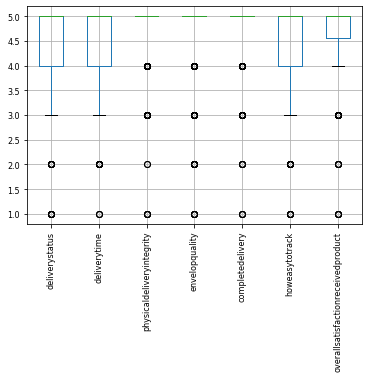

In [73]:
dfon.boxplot(column=["deliverystatus", "deliverytime", "physicaldeliveryintegrity", "envelopquality", "completedelivery", "howeasytotrack","overallsatisfactionreceivedproduct"],grid=True, rot=90, fontsize=8)
dfon[["deliverystatus", "deliverytime", "physicaldeliveryintegrity", "envelopquality", "completedelivery", "howeasytotrack","overallsatisfactionreceivedproduct"]].corr()

<AxesSubplot:>

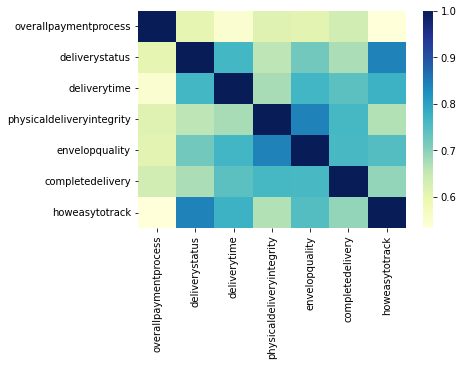

In [74]:
sns.heatmap(dfon_deliv.corr(), cmap="YlGnBu")

overallsatisfactionreceivedproduct  1.00  2.00  3.00  4.00  4.55   5.00
recommendation                                                         
0                                    2.0   NaN   1.0   NaN   NaN    NaN
1                                    1.0   NaN   NaN   NaN   NaN    NaN
2                                    1.0   NaN   NaN   NaN   NaN    NaN
4                                    NaN   NaN   1.0   NaN   NaN    NaN
5                                    NaN   1.0   NaN   1.0   NaN    1.0
6                                    NaN   1.0   NaN   2.0   1.0    NaN
7                                    NaN   2.0   2.0   6.0   NaN    8.0
8                                    NaN   NaN   7.0  13.0   NaN   17.0
9                                    NaN   1.0   6.0  16.0   NaN   42.0
10                                   1.0   NaN  14.0  18.0   5.0  220.0


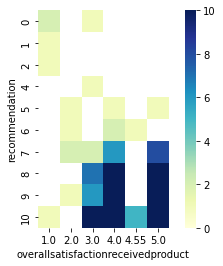

In [75]:
v = pd.pivot_table(dfon, values = 'date', index= 'recommendation', columns='overallsatisfactionreceivedproduct', aggfunc=np.size)
sns.heatmap(v, vmin=0, vmax=10, cmap="YlGnBu",square=True)
print(v)

**- Issues**

In [76]:
dfon_issues=dfon.iloc[:, [25,26,27,28,29,30,31,32,33,34,35,36,37]] 
dfon_issues.head(5)


overallsatisfactionreceivedproduct PPchangeneeded  \
0                                 5.0             Sí   
1                                 5.0             No   
2                                 5.0             Sí   
3                                 4.0             No   
4                                 4.0             No   

   PPcustomerserviceavailability  PPrefundandchangepolicy  \
0                            2.0                      2.0   
1                            NaN                      NaN   
2                            5.0                      5.0   
3                            NaN                      NaN   
4                            NaN                      NaN   

   PPcustomerserviceattention  PPcustomerservicesolutions  PPattentiontimes  \
0                         2.0                         2.0               2.0   
1                         NaN                         NaN               NaN   
2                         5.0                         5.0               5.0   
3                         NaN                         NaN               NaN   
4                         NaN                         NaN               NaN   

  PPissuesinlastmonths PPopenquestion-customerissues PPissuesolvedornot  \
0                   Sí           Pagos y facturación                 Sí   
1                   No                           NaN                NaN   
2                   No                           NaN                NaN   
3                   No                           NaN                NaN   
4                   No                           NaN                NaN   

   customerserviceeasytocontact  solutiontime  PPkindnesscustomerservice  
0                           2.0           2.0                        2.0  
1                           NaN           NaN                        NaN  
2                           NaN           NaN                        NaN  
3                           NaN           NaN                        NaN  
4                           NaN           NaN                        NaN

PPcustomerserviceavailability  \
PPcustomerserviceavailability                       1.000000   
PPrefundandchangepolicy                             0.809871   
PPcustomerserviceattention                          0.814529   
PPcustomerservicesolutions                          0.811488   
PPattentiontimes                                    0.816394   
customerserviceeasytocontact                        0.655317   
solutiontime                                        0.402390   
PPkindnesscustomerservice                           0.698483   
PPURCHoverallsolution                              -0.148664   

                               PPrefundandchangepolicy  \
PPcustomerserviceavailability                 0.809871   
PPrefundandchangepolicy                       1.000000   
PPcustomerserviceattention                    0.912543   
PPcustomerservicesolutions                    0.890270   
PPattentiontimes                              0.878977   
customerserviceeasytocontact                  0.458135   
solutiontime                                  0.435187   
PPkindnesscustomerservice                     0.587500   
PPURCHoverallsolution                        -0.092282   

                               PPcustomerserviceattention  \
PPcustomerserviceavailability                    0.814529   
PPrefundandchangepolicy                          0.912543   
PPcustomerserviceattention                       1.000000   
PPcustomerservicesolutions                       0.922775   
PPattentiontimes                                 0.890010   
customerserviceeasytocontact                     0.716753   
solutiontime                                     0.665339   
PPkindnesscustomerservice                        0.846397   
PPURCHoverallsolution                           -0.019926   

                               PPcustomerservicesolutions  PPattentiontimes  \
PPcustomerserviceavailability                    0.811488          0.816394   
PPrefundandchangepolicy                          0.890270          0.878977   
PPcustomerserviceattention                       0.922775          0.890010   
PPcustomerservicesolutions                       1.000000          0.926314   
PPattentiontimes                                 0.926314          1.000000   
customerserviceeasytocontact                     0.644603          0.634838   
solutiontime                                     0.627028          0.577689   
PPkindnesscustomerservice                        0.827709          0.780658   
PPURCHoverallsolution                           -0.005110         -0.086838   

                               customerserviceeasytocontact  solutiontime  \
PPcustomerserviceavailability                      0.655317      0.402390   
PPrefundandchangepolicy                            0.458135      0.435187   
PPcustomerserviceattention                         0.716753      0.665339   
PPcustomerservicesolutions                         0.644603      0.627028   
PPattentiontimes                                   0.634838      0.577689   
customerserviceeasytocontact                       1.000000      0.756482   
solutiontime                                       0.756482      1.000000   
PPkindnesscustomerservice                          0.783266      0.698775   
PPURCHoverallsolution                              0.506900      0.665593   

                               PPkindnesscustomerservice  \
PPcustomerserviceavailability                   0.698483   
PPrefundandchangepolicy                         0.587500   
PPcustomerserviceattention                      0.846397   
PPcustomerservicesolutions                      0.827709   
PPattentiontimes                                0.780658   
customerserviceeasytocontact                    0.783266   
solutiontime                                    0.698775   
PPkindnesscustomerservice                       1.000000   
PPURCHoverallsolution                           0.601149   

                               PPUR

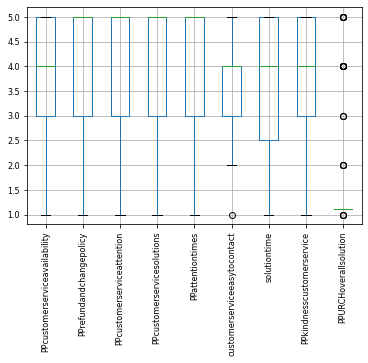

In [77]:
dfon.boxplot(column=['PPcustomerserviceavailability', 'PPrefundandchangepolicy', 'PPcustomerserviceattention', 'PPcustomerservicesolutions', 'PPattentiontimes', 'customerserviceeasytocontact', 'solutiontime',    'PPkindnesscustomerservice', 'PPURCHoverallsolution'],grid=True, rot=90, fontsize=8)
dfon[['PPcustomerserviceavailability', 'PPrefundandchangepolicy', 'PPcustomerserviceattention', 'PPcustomerservicesolutions', 'PPattentiontimes', 'customerserviceeasytocontact', 'solutiontime',    'PPkindnesscustomerservice', 'PPURCHoverallsolution']].corr()
#dfon[["customerserviceavailability", "refundandchangepolicy", "customerserviceattention", "customerservicesolutions", "attentiontimes", "customerserviceeasytocontact", "solutiontime", "kindnesscustomerservice", "overallsolution"]].corr()

<AxesSubplot:>

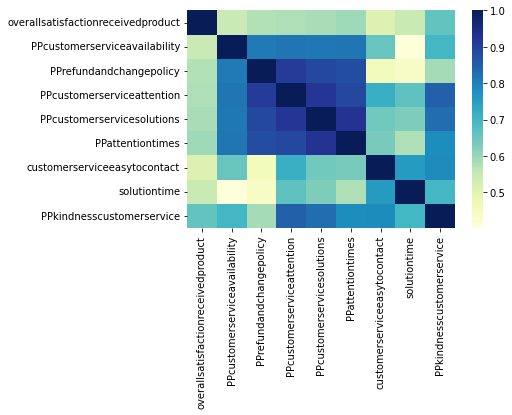

In [78]:
sns.heatmap(dfon_issues.corr(), cmap="YlGnBu")

PPURCHoverallsolution  1.00   1.12  2.00  3.00  4.00  5.00
recommendation                                            
0                       NaN    2.0   1.0   NaN   NaN   NaN
1                       NaN    1.0   NaN   NaN   NaN   NaN
2                       NaN    1.0   NaN   NaN   NaN   NaN
4                       NaN    1.0   NaN   NaN   NaN   NaN
5                       NaN    2.0   NaN   1.0   NaN   NaN
6                       NaN    4.0   NaN   NaN   NaN   NaN
7                       NaN   17.0   1.0   NaN   NaN   NaN
8                       NaN   35.0   1.0   NaN   1.0   NaN
9                       1.0   60.0   NaN   NaN   2.0   2.0
10                      2.0  249.0   NaN   1.0   3.0   3.0


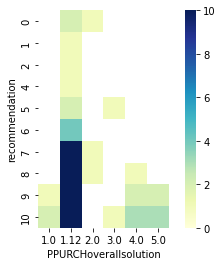

In [79]:
v = pd.pivot_table(dfon, values = 'date', index= 'recommendation', columns='PPURCHoverallsolution', aggfunc=np.size)
sns.heatmap(v, vmin=0, vmax=10, cmap="YlGnBu",square=True)
print(v)

**- Experience**

In [80]:
dfon_exp=dfon.iloc[:, [38,39,40]] 
dfon_exp.head(5)

PPURCHoverallsolution  satisfaction  repurchase_decision
0                   2.00             7                    8
1                   1.12             9                   10
2                   1.12             9                    9
3                   1.12             8                    6
4                   1.12             8                    6

satisfaction  repurchase_decision  recommendation
satisfaction             1.000000             0.807254        0.845112
repurchase_decision      0.807254             1.000000        0.888652
recommendation           0.845112             0.888652        1.000000

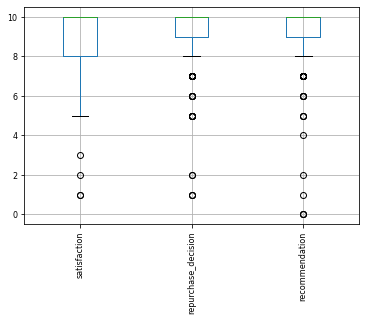

In [81]:
dfon.boxplot(column=["satisfaction", "repurchase_decision", "recommendation" ],grid=True, rot=90, fontsize=8)
dfon[["satisfaction", "repurchase_decision", "recommendation"]].corr()

<AxesSubplot:>

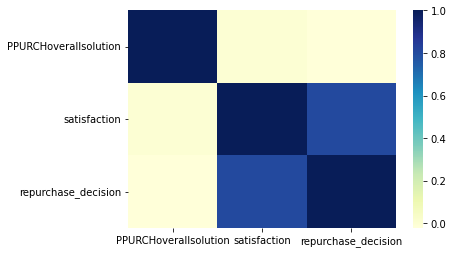

In [82]:
sns.heatmap(dfon_exp.corr(), cmap="YlGnBu")

repurchase_decision   1    2    5    6     7     8     9      10
recommendation                                                  
0                    3.0  NaN  NaN  NaN   NaN   NaN   NaN    NaN
1                    NaN  1.0  NaN  NaN   NaN   NaN   NaN    NaN
2                    NaN  1.0  NaN  NaN   NaN   NaN   NaN    NaN
4                    NaN  NaN  NaN  NaN   1.0   NaN   NaN    NaN
5                    NaN  NaN  2.0  1.0   NaN   NaN   NaN    NaN
6                    NaN  NaN  2.0  1.0   NaN   1.0   NaN    NaN
7                    NaN  NaN  NaN  1.0  11.0   4.0   1.0    1.0
8                    NaN  NaN  2.0  NaN   3.0  23.0   7.0    2.0
9                    NaN  NaN  NaN  2.0   1.0   9.0  33.0   20.0
10                   NaN  NaN  NaN  NaN   3.0   3.0  12.0  240.0


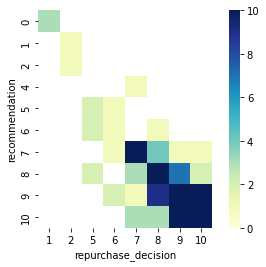

In [83]:
v = pd.pivot_table(dfon, values = 'date', index= 'recommendation', columns='repurchase_decision', aggfunc=np.size)
sns.heatmap(v, vmin=0, vmax=10, cmap="YlGnBu",square=True)
print(v)

<AxesSubplot:>

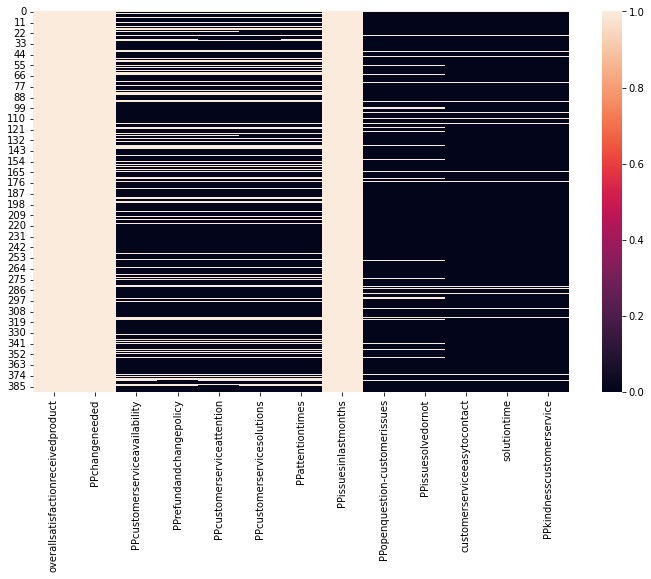

In [84]:
## many of customers didnt have issues with their purchases as changes or quality or size issues.
f, ax = plt.subplots(figsize=(12, 7))
ax = sns.heatmap(dfon_issues.notna())
ax

**VISUALIZATIONS**

<AxesSubplot:xlabel='device'>

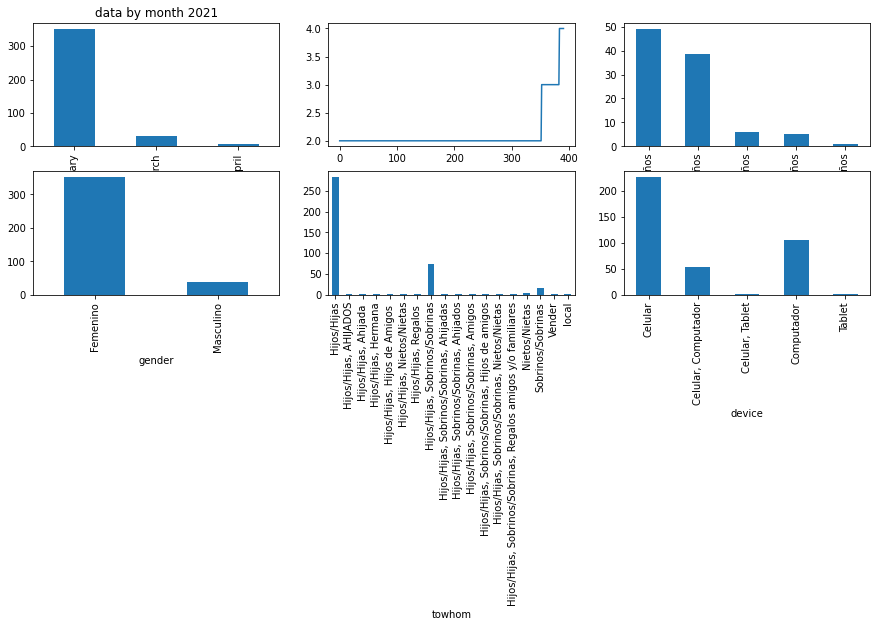

In [85]:
fig, axs = plt.subplots(2,3, figsize=(15,5))
dfon['month1'].value_counts().plot(kind='bar', title='data by month 2021', ax = axs[0,0])
dfon["month"].plot.line(ax = axs[0,1])
#data by age
ager = (dfon['age'].value_counts()/dfon['age'].count())*100 #porcentaje
ager.plot.bar(ax = axs[0,2])
#data by gender
dfon.groupby("gender").size().plot.bar(ax = axs[1,0])
# to whom customers buy 
dfon.groupby("towhom").size().plot.bar(ax = axs[1,1])
#from which device customers are purchasing
dfon.groupby("device").size().plot.bar(ax = axs[1,2])

**NPS**

In [86]:
#net promoter score filter by month
dfon["NPS_month"] = dfon["recommendation"].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [-1, -1, -1, -1, -1, -1, 0, 0, 1, 1])

dfon[["NPS_month",'month']].groupby(by=['month']).mean()

NPS_month
month           
2       0.795455
3       0.806452
4       1.000000

In [87]:
#net promoter score filter by age
dfon["NPS_age"] = dfon["recommendation"].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [-1, -1, -1, -1, -1, -1, 0, 0, 1, 1])

dfon[["NPS_age",'age']].groupby(by=['age']).mean()

NPS_age
age                   
18 a 25 años  0.952381
26 a 35 años  0.828125
36 a 45 años  0.794702
46 a 55 años  0.565217
56 a 65 años  0.250000

In [88]:
#nps by gender
dfon["NPS_gender"] = dfon["recommendation"].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [-1, -1, -1, -1, -1, -1, 0, 0, 1, 1])
dfon["NPS_gender"]
dfon[["NPS_gender",'gender']].groupby(by=['gender']).mean()

NPS_gender
gender               
Femenino     0.812500
Masculino    0.692308

In [89]:
#nps by device
dfon["NPS_device"] = dfon["recommendation"].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [-1, -1, -1, -1, -1, -1, 0, 0, 1, 1])
dfon["NPS_device"]
dfon[["NPS_device",'device']].groupby(by=['device']).mean()

NPS_device
device                         
Celular                0.814978
Celular, Computador    0.870370
Celular, Tablet        0.500000
Computador             0.735849
Tablet                 1.000000

In [90]:
dfon["NPS_towhom"] = dfon["recommendation"].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [-1, -1, -1, -1, -1, -1, 0, 0, 1, 1])
dfon["NPS_towhom"]
dfon[["NPS_towhom",'towhom']].groupby(by=['towhom']).mean()

NPS_towhom
towhom                                                        
Hijos/Hijas                                           0.787986
Hijos/Hijas, AHIJADOS                                 1.000000
Hijos/Hijas, Ahijada                                  1.000000
Hijos/Hijas, Hermana                                  0.000000
Hijos/Hijas, Hijos de Amigos                          1.000000
Hijos/Hijas, Nietos/Nietas                            1.000000
Hijos/Hijas, Regalos                                  1.000000
Hijos/Hijas, Sobrinos/Sobrinas                        0.863014
Hijos/Hijas, Sobrinos/Sobrinas, Ahijadas              1.000000
Hijos/Hijas, Sobrinos/Sobrinas, Ahijados              1.000000
Hijos/Hijas, Sobrinos/Sobrinas, Amigos                0.000000
Hijos/Hijas, Sobrinos/Sobrinas, Hijos de amigos       1.000000
Hijos/Hijas, Sobrinos/Sobrinas, Nietos/Nietas         1.000000
Hijos/Hijas, Sobrinos/Sobrinas, Regalos amigos ...    1.000000
Nietos/Nietas                                         0.600000
Sobrinos/Sobrinas                                     0.733333
Vender                                                1.000000
local                                                 1.000000

In [91]:
#net promoter score general
dfon["NPS_val_perc"] = dfon["recommendation"].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                                      [-100, -100, -100, -100, -100, -100, 0, 0, 100, 100])

NPS_ONL = int(dfon[["NPS_val_perc"]].mean())
NPS_ONL

80

In [92]:
def nps_zone(nps):
    if (nps >= 75.0 and nps <= 100.0):
        return "Excelent Zone"
    elif (nps >= 50.0 and nps <= 74.0):
        return "Quality Zone"
    elif (nps >= 0.0 and nps <= 49.0):
        return "Refinement Zone"
    else:
        return "Critic Zone"
    
nps_zone(NPS_ONL)

'Excelent Zone'

**RELATIONSHIP BETWEEN VARIABLES**

In [93]:
#NPS for all customers by online stores
d=dfon['recommendation']
#dfon.recommendation.columns=dfon[dfon["SCORE"]]
d =pd.DataFrame(d)
d
detractores = d[d["recommendation"] <= 6]
neutros = d[(d["recommendation"] >= 7) & (d["recommendation"] <= 8)]
promotores = d[(d["recommendation"] >= 9) & (d["recommendation"] <= 10)]

#columns to identify detractors, neutral, and promoters 
dfon["detractores"]=detractores
dfon["neutros"]=neutros
dfon["promotores"]=promotores

dfon["detractors"]=dfon["detractores"].fillna(0).apply(lambda d: "detractor" if d != 0 else "")
dfon["neutrals"]=dfon["neutros"].fillna(0).apply(lambda d: "neutral" if d != 0 else "")
dfon["promoters"]=dfon["promotores"].fillna(0).apply(lambda d: "promoter" if d != 0 else "")
dfon["customertype"]= dfon["detractors"]+dfon["neutrals"]+dfon["promoters"]
#dfon ["customertype1"]= dfon["customertype"].apply(lambda d: "promoter" if d != "promoter" else "0")
dfon["customertype1"] = dfon["customertype"].replace(["promoter","neutral", "detractor"], [1, 0, 0])

# column customertype to classify between 1 or 0.- promoter or detractor
dfon["customertype2"] = dfon["recommendation"].replace([0, 1, 2, 3, 4, 5, 6,7,8,9,10], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])


**Relationships between `loan_status` and other variables**

In [94]:
def get_ct(dfon, var, ref):
    ct_res = pd.crosstab(dfon[var], dfon['customertype'], margins=True)
    ct_res[ref+'(%)'] = round( ct_res[ref]/ct_res['All']*100, 2)
    return ct_res.drop(columns='All')


In [95]:
get_ct(dfon, 'gender', 'detractor')

customertype     detractor  neutral  promoter  detractor(%)
gender                                                     
Femenino      2          9       46       295          2.56
Masculino     1          1        9        28          2.56
All           3         10       55       323          2.56

In [96]:
get_ct(dfon, 'age' , 'detractor')

customertype     detractor  neutral  promoter  detractor(%)
age                                                        
18 a 25 años  0          0        1        20          0.00
26 a 35 años  2          5       21       164          2.60
36 a 45 años  1          3       24       123          1.99
46 a 55 años  0          1        8        14          4.35
56 a 65 años  0          1        1         2         25.00
All           3         10       55       323          2.56

In [97]:
#chi square test for gender - customertype doesnt seem statistically associated with gender

chi2, p, dof, ex = chi2_contingency(pd.crosstab(index=dfon['customertype'], columns=dfon['gender']))
print('Gender: p-value of chisquare test =', p)

Gender: p-value of chisquare test = 0.17650226806418268


In [98]:
#chi square test for gender - customertype seems statistically associated with age
chi2, p, dof, ex = chi2_contingency(pd.crosstab(index=dfon['customertype'], columns=dfon['age']))
print('Age: p-value of chisquare test =', p)

Age: p-value of chisquare test = 0.034674795401523885


In [99]:
#chi square test for gender - customertype doesnt seem statistically associated with device

chi2, p, dof, ex = chi2_contingency(pd.crosstab(index=dfon['customertype'], columns=dfon['device']))
print('Device: p-value of chisquare test =', p)

Device: p-value of chisquare test = 0.6183309019637704


In [100]:
# function for building contigency tables, it summarize the relationship between several categorical variables. 
#A contingency table is a special type of frequency distribution table, where two variables are shown simultaneously.

def get_ct_stra(stra_var):
    ct_stra = pd.crosstab(index=[stra_var,dfon.gender], columns = dfon.customertype, margins = True)
    ct_stra['promoter (%)'] = round(ct_stra['promoter']/ct_stra['All']*100,2)
    return ct_stra.drop(columns='All').drop('All', level=0)

In [101]:
get_ct_stra(dfon.age)

customertype               detractor  neutral  promoter  promoter (%)
age          gender                                                  
18 a 25 años Femenino   0          0        1        16         94.12
             Masculino  0          0        0         4        100.00
26 a 35 años Femenino   1          5       18       152         86.36
             Masculino  1          0        3        12         75.00
36 a 45 años Femenino   1          3       20       112         82.35
             Masculino  0          0        4        11         73.33
46 a 55 años Femenino   0          0        6        13         68.42
             Masculino  0          1        2         1         25.00
56 a 65 años Femenino   0          1        1         2         50.00

**LOGISTIC REGRESSION**

In [102]:
#to show which are categorical variables
dfon.dtypes

#to transform into categorical variable
dfon["age"] = dfon["age"].astype('category')
dfon["gender"] = dfon["gender"].astype('category')
dfon["device"] = dfon["device"].astype('category')

dfon.dtypes
dfon.device.cat.codes

#to verify there are no missing values on customertype2
#dfon[["customertype1"]].groupby(by=["customertype1"]).size()
dfon["customertype2"] = dfon["recommendation"].replace([0, 1, 2, 3, 4, 5, 6,7,8,9,10], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])
dfon[dfon["customertype2"] ==""]

# code logistic regression for age variable

dfon_log1 = pd.DataFrame(columns=['age','customertype2'])

dfon_log1['age'] = dfon.age.cat.codes
dfon_log1['customertype2'] = dfon.customertype2
dfon_log1['Intercept'] = 1

logit = sm.Logit(dfon_log1['customertype2'], dfon_log1[['Intercept','age']])
logit_res = logit.fit()
logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.448229
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          customertype2   No. Observations:                  391
Model:                          Logit   Df Residuals:                      389
Method:                           MLE   Df Model:                            1
Date:                Wed, 01 Sep 2021   Pseudo R-squ.:                 0.02988
Time:                        00:21:04   Log-Likelihood:                -175.26
converged:                       True   LL-Null:                       -180.66
Covariance Type:            nonrobust   LLR p-value:                  0.001016
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4861      0.330      7.533      0.000       1.839       3.133
age           -0.5868      0.180     -3.268      0.001      -0.939      -0.235
==============================================================================
"""

For instance, from the results shown above for the model `logit_res`, the coefficients indicate that when `verfication_status` increases by 1, the odds of pay-off decreases by 14%. Since the $p$-value for the coefficient is smaller than 0.05, we can conclude that the decreasing trend we observed from the table is not likely due to randomness.

An important output above is `Pseudo R-squ.`. This metric is similar to R-squared for linear models. If this number is large, then the variables in the model explain a large portion of the drivers of people's tendency to pay off their debt. In our case, the metric is only 0.2%, which means that we have a lot of room to improve.

In [103]:
# code logistic regression for 6 variables incluidjng satisfaction and repurchase_decision
dfon6=dfon.copy()
dfon6['customertype2'] = dfon6.customertype2
dfon6['age'] = dfon.age.cat.codes
dfon6['gender'] = dfon.gender.cat.codes
dfon6['device'] = dfon.device.cat.codes

dfon6['satisfaction']=(dfon6['satisfaction']-dfon6['satisfaction'].mean())/dfon6['satisfaction'].std()
dfon6['repurchase_decision']=(dfon6['repurchase_decision']-dfon6['repurchase_decision'].mean())/dfon6['repurchase_decision'].std()
dfon6['availability_sizeandcolors']=(dfon6['availability_sizeandcolors']-dfon6['availability_sizeandcolors'].mean())/dfon6['availability_sizeandcolors'].std()
dfon6['Intercept'] = 1
logit2 = sm.Logit(dfon6['customertype2'], dfon6[['Intercept','age', 'gender', 'device', 'repurchase_decision','satisfaction', 'availability_sizeandcolors']])
logit_res2 = logit2.fit()
logit_res2.summary()

Optimization terminated successfully.
         Current function value: 0.164702
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          customertype2   No. Observations:                  391
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            6
Date:                Wed, 01 Sep 2021   Pseudo R-squ.:                  0.6435
Time:                        00:21:05   Log-Likelihood:                -64.398
converged:                       True   LL-Null:                       -180.66
Covariance Type:            nonrobust   LLR p-value:                 2.224e-47
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      3.5418      0.672      5.269      0.000       2.224       4.859
age                           -0.1811      0.327     -0.554      0.579      -0.822       0.459
gender                        -0.3170      0.694     -0.457      0.648      -1.676       1.042
device                        -0.0414      0.174     -0.238      0.812      -0.383       0.300
repurchase_decision            1.8466      0.345      5.360      0.000       1.171       2.522
satisfaction                   2.2406      0.423      5.299      0.000       1.412       3.069
availability_sizeandcolors     0.0243      0.282      0.086      0.931      -0.529       0.577
==============================================================================================
"""

For instance, from the results shown above for the model `logit_2`, the coefficients indicate that when `repurchase_decision` increases by 1, the odds of be a promoter decreases by 188% and the coefficients indicate that when `satisfaction` increases by 1, the odds of be a promoter decreases by 226%  . Since the $p$-value for the coefficient is smaller than 0.05, we can conclude that the increasing trend we observed from the table is not likely due to randomness.

An important output above is `Pseudo R-squ.`. This metric is similar to R-squared for linear models. If this number is large, then the variables in the model explain a large portion of the customers tendency to be promoters. In our case, the metric is only 64%, which means this variables explain customers become promoters.

In [104]:
# code logistic regression for 6 variables without satisfaction and repurchase_decision

dfon6=dfon.copy()
dfon6['customertype2'] = dfon6.customertype2
dfon6['age'] = dfon.age.cat.codes
dfon6['gender'] = dfon.gender.cat.codes
dfon6['device'] = dfon.device.cat.codes

#dfon6['satisfaction']=(dfon6['satisfaction']-dfon6['satisfaction'].mean())/dfon6['satisfaction'].std()
#dfon6['repurchase_decision']=(dfon6['repurchase_decision']-dfon6['repurchase_decision'].mean())/dfon6['repurchase_decision'].std()
dfon6['availability_sizeandcolors']=(dfon6['availability_sizeandcolors']-dfon6['availability_sizeandcolors'].mean())/dfon6['availability_sizeandcolors'].std()
dfon6["overallsatisfactionnavigation"]=(dfon6['overallsatisfactionnavigation']-dfon6['overallsatisfactionnavigation'].mean())/dfon6['overallsatisfactionnavigation'].std()
dfon6["overallpaymentprocess"]=(dfon6['overallpaymentprocess']-dfon6['overallpaymentprocess'].mean())/dfon6['overallpaymentprocess'].std()
dfon6["overallsatisfactionreceivedproduct"]=(dfon6['overallsatisfactionreceivedproduct']-dfon6['overallsatisfactionreceivedproduct'].mean())/dfon6['overallsatisfactionreceivedproduct'].std()
dfon6["PPURCHoverallsolution"]=(dfon6['PPURCHoverallsolution']-dfon6['PPURCHoverallsolution'].mean())/dfon6['PPURCHoverallsolution'].std()


dfon6['Intercept'] = 1
logit2 = sm.Logit(dfon6['customertype2'], dfon6[['Intercept','age', 'gender', 'device', 'availability_sizeandcolors', 'overallsatisfactionnavigation','overallpaymentprocess','overallsatisfactionreceivedproduct','PPURCHoverallsolution']])
logit_res2 = logit2.fit()
logit_res2.summary()

Optimization terminated successfully.
         Current function value: 0.350739
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          customertype2   No. Observations:                  391
Model:                          Logit   Df Residuals:                      382
Method:                           MLE   Df Model:                            8
Date:                Wed, 01 Sep 2021   Pseudo R-squ.:                  0.2409
Time:                        00:21:06   Log-Likelihood:                -137.14
converged:                       True   LL-Null:                       -180.66
Covariance Type:            nonrobust   LLR p-value:                 1.857e-15
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              3.1718      0.419      7.575      0.000       2.351       3.993
age                                   -0.6624      0.213     -3.109      0.002      -1.080      -0.245
gender                                -0.7193      0.467     -1.541      0.123      -1.635       0.196
device                                -0.1203      0.117     -1.032      0.302      -0.349       0.108
availability_sizeandcolors             0.3071      0.205      1.496      0.135      -0.095       0.709
overallsatisfactionnavigation          0.8188      0.230      3.559      0.000       0.368       1.270
overallpaymentprocess                 -0.4758      0.214     -2.222      0.026      -0.895      -0.056
overallsatisfactionreceivedproduct     0.5458      0.170      3.213      0.001       0.213       0.879
PPURCHoverallsolution                  0.1243      0.172      0.724      0.469      -0.212       0.461
======================================================================================================
"""

In [105]:
# code logistic regression for 10 variables incluiding satisfaction and repurchase_decision

dfon6=dfon.copy()
dfon6['customertype2'] = dfon6.customertype2
dfon6['age'] = dfon.age.cat.codes
dfon6['gender'] = dfon.gender.cat.codes
dfon6['device'] = dfon.device.cat.codes

dfon6['satisfaction']=(dfon6['satisfaction']-dfon6['satisfaction'].mean())/dfon6['satisfaction'].std()
dfon6['repurchase_decision']=(dfon6['repurchase_decision']-dfon6['repurchase_decision'].mean())/dfon6['repurchase_decision'].std()
dfon6['availability_sizeandcolors']=(dfon6['availability_sizeandcolors']-dfon6['availability_sizeandcolors'].mean())/dfon6['availability_sizeandcolors'].std()
dfon6["overallsatisfactionnavigation"]=(dfon6['overallsatisfactionnavigation']-dfon6['overallsatisfactionnavigation'].mean())/dfon6['overallsatisfactionnavigation'].std()
dfon6["overallpaymentprocess"]=(dfon6['overallpaymentprocess']-dfon6['overallpaymentprocess'].mean())/dfon6['overallpaymentprocess'].std()
dfon6["overallsatisfactionreceivedproduct"]=(dfon6['overallsatisfactionreceivedproduct']-dfon6['overallsatisfactionreceivedproduct'].mean())/dfon6['overallsatisfactionreceivedproduct'].std()
dfon6["PPURCHoverallsolution"]=(dfon6['PPURCHoverallsolution']-dfon6['PPURCHoverallsolution'].mean())/dfon6['PPURCHoverallsolution'].std()


dfon6['Intercept'] = 1
logitA = sm.Logit(dfon6['customertype2'], dfon6[['Intercept', 'satisfaction', 'repurchase_decision', 'age', 'gender', 'device', 'availability_sizeandcolors', 'overallsatisfactionnavigation','overallpaymentprocess','overallsatisfactionreceivedproduct','PPURCHoverallsolution']])
logit_resA = logitA.fit()
logit_resA.summary()

Optimization terminated successfully.
         Current function value: 0.158349
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          customertype2   No. Observations:                  391
Model:                          Logit   Df Residuals:                      380
Method:                           MLE   Df Model:                           10
Date:                Wed, 01 Sep 2021   Pseudo R-squ.:                  0.6573
Time:                        00:21:07   Log-Likelihood:                -61.914
converged:                       True   LL-Null:                       -180.66
Covariance Type:            nonrobust   LLR p-value:                 2.312e-45
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              3.6791      0.714      5.152      0.000       2.279       5.079
satisfaction                           2.2023      0.448      4.919      0.000       1.325       3.080
repurchase_decision                    1.8379      0.361      5.092      0.000       1.131       2.545
age                                   -0.1974      0.343     -0.575      0.565      -0.870       0.475
gender                                -0.1981      0.728     -0.272      0.785      -1.624       1.228
device                                -0.0429      0.182     -0.236      0.814      -0.400       0.314
availability_sizeandcolors            -0.0840      0.330     -0.254      0.799      -0.732       0.564
overallsatisfactionnavigation          0.2811      0.325      0.864      0.388      -0.357       0.919
overallpaymentprocess                 -0.2849      0.260     -1.094      0.274      -0.795       0.225
overallsatisfactionreceivedproduct     0.4324      0.273      1.582      0.114      -0.103       0.968
PPURCHoverallsolution                  0.1220      0.260      0.468      0.640      -0.389       0.633
======================================================================================================
"""

In [106]:
# code logistic regression for 2 variables incluiding satisfaction and repurchase_decision

dfon7=dfon.copy()
dfon7['customertype2'] = dfon7.customertype2

dfon7['satisfaction']=(dfon7['satisfaction']-dfon7['satisfaction'].mean())/dfon7['satisfaction'].std()
dfon7['repurchase_decision']=(dfon7['repurchase_decision']-dfon7['repurchase_decision'].mean())/dfon7['repurchase_decision'].std()


dfon7['Intercept'] = 1
logit3 = sm.Logit(dfon7['customertype2'], dfon7[['Intercept', 'satisfaction', 'repurchase_decision']])
logit_res3 = logit3.fit()
logit_res3.summary()

Optimization terminated successfully.
         Current function value: 0.165575
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          customertype2   No. Observations:                  391
Model:                          Logit   Df Residuals:                      388
Method:                           MLE   Df Model:                            2
Date:                Wed, 01 Sep 2021   Pseudo R-squ.:                  0.6416
Time:                        00:21:07   Log-Likelihood:                -64.740
converged:                       True   LL-Null:                       -180.66
Covariance Type:            nonrobust   LLR p-value:                 4.551e-51
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.1841      0.401      7.947      0.000       2.399       3.969
satisfaction            2.2615      0.415      5.448      0.000       1.448       3.075
repurchase_decision     1.8846      0.326      5.773      0.000       1.245       2.524
=======================================================================================
"""

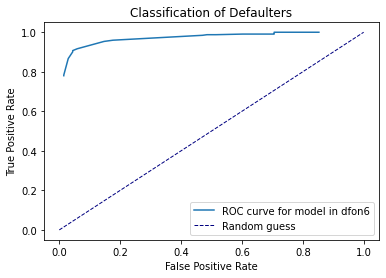

In [107]:
# code logistic regression for 10 variables incluiding satisfaction and repurchase_decision

#This function calculates the TPR and TNR for given p


def rates(p):
    b_Intercept=3.7861 #Here your coeff
    b_satisfaction=2.2244 #Here your coeff
    b_repurchase_decision=1.8301 #Here your coeff

    a= dfon6.customertype2
    b=(b_Intercept+ b_satisfaction*dfon6['satisfaction']+b_repurchase_decision*dfon6['repurchase_decision']>np.log(p/(1-p))).astype('int')
    
    TPR=(a & b).sum(axis=0)/a.sum(axis=0)
    TNR=(1-a & 1-b).sum(axis=0)/(1-a).sum(axis=0)
    return [TPR,TNR]

#Then, we use this function to plot the ROC curve
x=[]
y=[]
for p in np.arange(0.01,0.99,0.01):
    z=rates(p)
    y.append(z[0])
    x.append(1-z[1])
    
fig, ax = plt.subplots()

ax.plot(x,y, label=f'ROC curve for model in dfon6')
ax.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification of Defaulters')
plt.legend(loc='lower right')

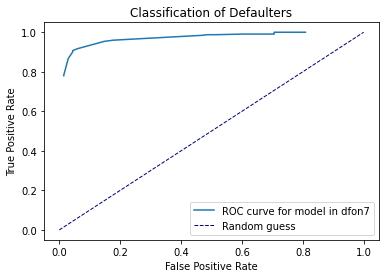

In [108]:
#This function calculates the TPR and TNR for given p
# code logistic regression for 2 variables incluiding satisfaction and repurchase_decision


def rates(p):
    b_Intercept=3.1841 #Here your coeff
    b_satisfaction=2.2615 #Here your coeff
    b_repurchase_decision=1.8846 #Here your coeff

    a= dfon7.customertype2
    b=(b_Intercept+ b_satisfaction*dfon7['satisfaction']+b_repurchase_decision*dfon7['repurchase_decision']>np.log(p/(1-p))).astype('int')
    
    TPR=(a & b).sum(axis=0)/a.sum(axis=0)
    TNR=(1-a & 1-b).sum(axis=0)/(1-a).sum(axis=0)
    return [TPR,TNR]

#Then, we use this function to plot the ROC curve
x=[]
y=[]
for p in np.arange(0.01,0.99,0.01):
    z=rates(p)
    y.append(z[0])
    x.append(1-z[1])
    
fig, ax = plt.subplots()

ax.plot(x,y, label=f'ROC curve for model in dfon7')
ax.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification of Defaulters')
plt.legend(loc='lower right')

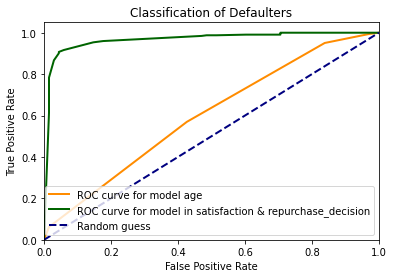

In [109]:
# assessment on the aacuracy for two different logistic regression for variable "age" and the model incluiding satisfaction and repurchase_decision




predict_p = logit_res.predict(dfon_log1[['Intercept','age']])
predict_2_p = logit_res3.predict(dfon7[['Intercept','satisfaction','repurchase_decision']])
roc_p = roc_curve(dfon_log1['customertype2'], predict_p)
roc_2_p = roc_curve(dfon7['customertype2'], predict_2_p)

plt.figure()
line_width = 2
plt.plot(roc_p[0], roc_p[1], color='darkorange',
         lw=line_width, label=f'ROC curve for model age')
plt.plot(roc_2_p[0], roc_2_p[1], color='darkgreen',
         lw=line_width, label=f'ROC curve for model in satisfaction & repurchase_decision')
plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification of Defaulters')
plt.legend(loc='lower right')
plt.show()

In [110]:
#code for calculating AUC for age and satisfaction and repurchase_decision.
auc_p = auc( roc_p[0], roc_p[1] )
auc_2_p = auc( roc_2_p[0], roc_2_p[1] )

print('AUC of `model age`: ', auc_p)
print('AUC of the  model in satisfaction & repurchase_decision: ', auc_2_p)

AUC of `model age`:  0.6014387179020215
AUC of the  model in satisfaction & repurchase_decision:  0.9665361500637406


**RADAR GRAPH BY CATEGORY**

In [111]:
import plotly.graph_objects as go
var_1 = ["repurchase_decision", "shopkeeper_attention", "recommendation"]

r1 = df_clean[var_1]                                                                                                                                         
r2= r1.mean()

fig = go.Figure()
fig.add_trace(go.Scatterpolar(r=r2, theta=var_1, fill='toself', name='Voicebots'))
fig.update_layout(polar=dict(radialaxis=dict(visible=True,range=[0, 9])), showlegend=True)
fig.show()

# Outlets

In [112]:
df_outlets = outlet.copy()
#Dicc Cambio de preg
# PRD = PREGUNTAS RELACIONADAS CON EL PRODUCTO [6-12]
# ASE = PREGUNTAS RELACIONADAS CON EL EQUIPO EN TIENDAS [13-19]
# CRF = PREGUNTAS RELACIONADAS CON CARACTERISTICAS FISICAS DE LA TIENDA (OUTLETS) [20-24]
# EXC = PREGUNTAS RELACIONADAS CON LA EXP EN COMPRA EN NUESTRAS TIENDAS (OUTLETS) [25-28]
New_columns = ['TIME','GENDER','CITY','AGE','TOWHOM','PRODUCT_VARIETY','PRODUCT_DESGIN','PRODUCT_AVAILABILITY','PRODUCT_QUALITY','PRIZE_VS_PRODUCT','DISSCOUNTS','GENERAL_SATISFACTION_PROD','KINDNESS_ATTENTION','INTEREST_FOR_KID','INTEREST_FOR_NECESSITY','EASY_TO_FIND','OFFER_FULLLOOK','ACCOMPANIMENT_DURING_PURCHASE','GENERAL_SATISFACTION_ASSESORY','PHYSICAL_DESIGN','VARIETY_PROD_STORE','INFO_PRODUCTS','MUSIC_FEELING','DRESSING_ROOMS','DISSCOUNTS_CLARITY','PAY_AGILITY','CHANGES_AND_WARRANTIES','GENERAL_SATISFACTION_SHOPPING','DRAWBACK','COMMENT_ISSUE','ISSUE_SOLVED','CANTACT_SERVICE','TIME_SOLVING','HOSPITALITY','GENERAL_SATISFACTION_ISSUE','GENERAL_SATISFACTION_OUTLETS','REPURCHASE','RECOMMEND_OFF']
df_outlets.columns = New_columns
print("Rango de edad:\n\n",df_outlets['AGE'].unique(),'\n')
print("Cuidad:\n\n",df_outlets['CITY'].unique(),'\n')
print("Sexo:\n\n",df_outlets['GENDER'].unique(),'\n')

Rango de edad:

 ['56 - 65' '36 - 45' '18 - 25' '46 - 55' '26 - 35'] 

Cuidad:

 ['Medellin' 'Bogota' 'Boyaca' 'Pasto' 'Otros' 'Cali' 'Barranquilla'
 'Villavicencio' 'Boyaca '] 

Sexo:

 ['Femenino' 'Masculino'] 



In [113]:
df_outlets.describe().T.head(5)

count      mean       std  min  25%  50%  75%  max
PRODUCT_VARIETY       371.0  3.743935  1.190814  1.0  3.0  4.0  5.0  5.0
PRODUCT_DESGIN        371.0  4.083558  1.013970  1.0  3.0  4.0  5.0  5.0
PRODUCT_AVAILABILITY  371.0  3.261456  1.191908  1.0  2.0  3.0  4.0  5.0
PRODUCT_QUALITY       371.0  4.283019  0.990881  1.0  4.0  5.0  5.0  5.0
PRIZE_VS_PRODUCT      371.0  3.846361  1.120138  1.0  3.0  4.0  5.0  5.0

In [114]:
df_outlets.columns

Index(['TIME', 'GENDER', 'CITY', 'AGE', 'TOWHOM', 'PRODUCT_VARIETY',
       'PRODUCT_DESGIN', 'PRODUCT_AVAILABILITY', 'PRODUCT_QUALITY',
       'PRIZE_VS_PRODUCT', 'DISSCOUNTS', 'GENERAL_SATISFACTION_PROD',
       'KINDNESS_ATTENTION', 'INTEREST_FOR_KID', 'INTEREST_FOR_NECESSITY',
       'EASY_TO_FIND', 'OFFER_FULLLOOK', 'ACCOMPANIMENT_DURING_PURCHASE',
       'GENERAL_SATISFACTION_ASSESORY', 'PHYSICAL_DESIGN',
       'VARIETY_PROD_STORE', 'INFO_PRODUCTS', 'MUSIC_FEELING',
       'DRESSING_ROOMS', 'DISSCOUNTS_CLARITY', 'PAY_AGILITY',
       'CHANGES_AND_WARRANTIES', 'GENERAL_SATISFACTION_SHOPPING', 'DRAWBACK',
       'COMMENT_ISSUE', 'ISSUE_SOLVED', 'CANTACT_SERVICE', 'TIME_SOLVING',
       'HOSPITALITY', 'GENERAL_SATISFACTION_ISSUE',
       'GENERAL_SATISFACTION_OUTLETS', 'REPURCHASE', 'RECOMMEND_OFF'],
      dtype='object')

# General Insights

**RADAR GRAPH BY CATEGORY**

In [115]:
def radar_graph(df, var, name1):
    import plotly.graph_objects as go
    r1 = df[var]                                                                                                                                         
    r2= r1.mean()
    max_val = r1.max().max()
    fig = go.Figure()
    fig.add_trace(go.Scatterpolar(r=r2, theta=var, fill='toself', name=name1))
    fig.update_layout(polar=dict(radialaxis=dict(visible=True,range=[0, max_val])), showlegend=True)
    fig.show()

In [116]:
var_online = ['overallsatisfactionnavigation', 'overallpaymentprocess', 'overallsatisfactionreceivedproduct', 'PPURCHoverallsolution']
var_outlets = ['GENERAL_SATISFACTION_PROD', 'GENERAL_SATISFACTION_ASSESORY', 'GENERAL_SATISFACTION_SHOPPING', 'GENERAL_SATISFACTION_ISSUE']
var_pstore = ["product_satisfaction", "shopkeeper_satisfaction", "experience_satisfaction","inconvenient_satisfaction"]
var_voicebots = ["repurchase_decision", "shopkeeper_attention", "recommendation"]
radar_graph(dfon, var_online, "Online")
radar_graph(df_outlets, var_outlets, "Outlets")
radar_graph(p_store_clean, var_pstore, "P_Store")
radar_graph(df_clean, var_voicebots, "Voicebots")

**CONDITIONAL PROBABILITY**

In [117]:
def cond_prob(df, i1, i2):
    import matplotlib.pyplot as plt
    df_1 = df.copy()

    df_1 ['v1'] = i1
    df_1['cuenta'] = 1
    df_1["v2"] = i2
    df_prob = df_1[['v2','v1','cuenta']]
    pivot=pd.pivot_table(df_prob, values='cuenta', index=['v2'], columns=['v1'], aggfunc=np.size, fill_value=0)

    #Calculations of parts:
    P_A1=(pivot.iloc[1,0]+ pivot.iloc[1,1])/(pivot.iloc[0,1]+pivot.iloc[1,1]+pivot.iloc[0,0]+pivot.iloc[1,0]) 
    P_B1=(pivot.iloc[0,1]+ pivot.iloc[1,1])/(pivot.iloc[0,1]+pivot.iloc[1,1]+pivot.iloc[0,0]+pivot.iloc[1,0]) 
    P_AUB1=(pivot.iloc[1,1])/(pivot.iloc[0,1]+pivot.iloc[1,1]+pivot.iloc[0,0]+pivot.iloc[1,0]) 
    
    P_ACB1 = P_AUB1/P_B1

    kpi_1 = P_ACB1
    kpi_2 = 1 - P_ACB1
        
    plt.bar(x = var[0], height = kpi_1, label='Recommend') ## Se crea la primera barra
    plt.bar(x = var[0], height = kpi_2, label="Don't recommend", bottom = kpi_1)  ## Se crea la segunda barra y se apila sobre las primera

    plt.title('Prob. of recommend OFFCORSE given another variable')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()
    
    return P_ACB1

* Voicebots

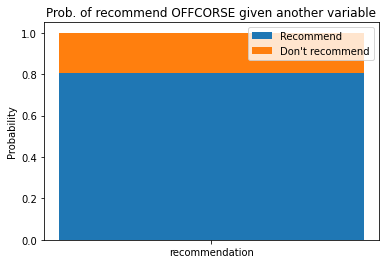

The prob of recommend OFFCORSE given another variable is: 80.8 %


In [118]:
# Variables
var = ["recommendation", "shopkeeper_attention", "queue_name"]
data = df_clean

# Variable to analyze
i2 = data[var[0]].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

# Given variable 1
i1a = np.where(data[var[1]] >= 8 , 1, 0)

# Given variable 2
opt = ["-", "CHAT-COBRANZAS", "CHAT-SAC", "CHAT-VENTAS", "INTERES COMERCIAL MANUAL", "PRUEBAS"]
i1b = np.where(data[var[2]] == opt[1] , 1, 0)

# Conditional probabilities
cp = cond_prob(data, i1b, i2)
print("The prob of recommend OFFCORSE given another variable is:", np.round(cp*100,1), "%")



* P-Store

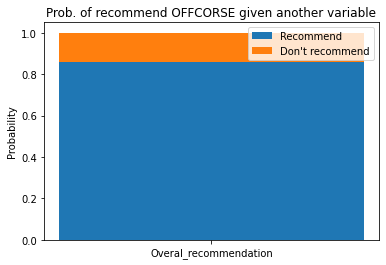

The prob of recommend OFFCORSE given another variable is: 85.8 %


In [119]:
# Variables
var = ["Overal_recommendation", "Overal_satisfaction", "gender", "age"]
data = p_store_clean.copy()

# Variable to analyze
i2 = data[var[0]].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

# Given variable 1
i1a = np.where(data[var[1]] >= 8 , 1, 0)

# Given variable 2
opt = ["Masculino", "Femenino"]
i1b = np.where(data[var[2]] == opt[0] , 1, 0)

# Given variable 3
opt = p_store_clean['age'].unique()
i1c = np.where(data[var[3]] == opt[1] , 1, 0)

# Conditional probabilities

cp = cond_prob(data, i1a, i2)

print("The prob of recommend OFFCORSE given another variable is:", np.round(cp*100,1), "%")

In [120]:
p_store_clean['age'].unique()

array(['36 - 45', '46 - 55', '18 - 25', '26 - 35', '56 - 65', '> 66'],
      dtype=object)

* Online

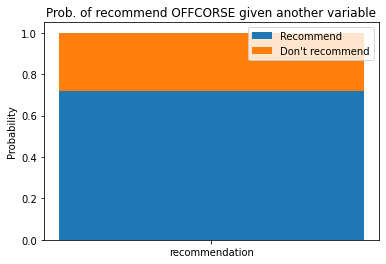

The prob of recommend OFFCORSE given another variable is: 71.8 %


In [121]:
# Variables
var = ["recommendation", "satisfaction", "gender"]
data = dfon.copy()

# Variable to analyze
i2 = data[var[0]].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

# Given variable 1
i1a = np.where(data[var[1]] >= 8 , 1, 0)

# Given variable 2
opt = ["Masculino", "Femenino"]
i1b = np.where(data[var[2]] == opt[0] , 1, 0)

# Conditional probabilities
cp = cond_prob(data, i1b, i2)

print("The prob of recommend OFFCORSE given another variable is:", np.round(cp*100,1), "%")

* Outlets

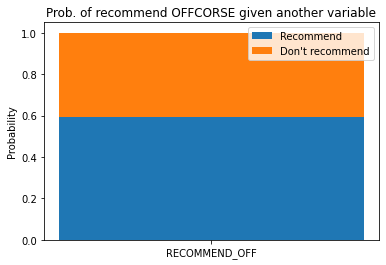

The prob of recommend OFFCORSE given another variable is: 59.5 %


In [122]:
# Variables
var = ['RECOMMEND_OFF', 'GENERAL_SATISFACTION_OUTLETS', "GENDER"]
data = df_outlets.copy()

# Variable to analyze
i2 = data[var[0]].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

# Given variable 1
i1a = np.where(data[var[1]] >= 8 , 1, 0)

# Given variable 2
opt = ["Masculino", "Femenino"]
i1b = np.where(data[var[2]] == opt[0] , 1, 0)

# Conditional probabilities
cp = cond_prob(data, i1b, i2)

print("The prob of recommend OFFCORSE given another variable is:", np.round(cp*100,1), "%")

**NLP**

In [123]:
import re
import string
from nltk.corpus import stopwords
def remove_noise(review):
    review = review.lower()
    review = re.sub("(@[A-Za-z0–9_]+)","", review)
    review ="".join([char if char not in string.punctuation else " " for char in review])
    review = re.sub(' +', ' ', review) 
    review = re.sub("[0–9]+","", review)
    review = re.sub("[^A-Za-z0–9_. ]+","",review)
 
    return review

from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=1,k=1):
    
    vec = CountVectorizer(ngram_range=(k,k),stop_words = stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    common_words = words_freq[:n]
    #for word, freq in common_words:
    #    print(word, freq)
    df = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
    titulo = "Top "+str(n)+" words from all reviews"
    df.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',  title=titulo)
    
    return words_freq[:n]

def wordcloud(tweets,col,idgraf):
    import matplotlib.pyplot as plt
    from wordcloud import WordCloud
    #Crear la imagen con las palabras más frecuentes
    wordcloud = WordCloud(background_color="white",stopwords=stop_words).generate(" ".join([i for i in tweets[col]])) # ,random_state = 1
    #Preparar la figura
    plt.figure(num=idgraf, figsize=(10,5), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Good Morning Datascience+")

In [124]:
df = df_clean.copy()
var_NLP = ['recommendation', 'sugestion_description']

OnlyReviews_NPS = df[var_NLP[1]]
OnlyGoodReviews_NPS = df[df[var_NLP[0]]>7][var_NLP[1]]
OnlyBadReviews_NPS = df[df[var_NLP[0]]<6][var_NLP[1]]
options_N = [7, 8]
OnlyNeutralReviews_NPS = df[df[var_NLP[0]].isin(options_N)][var_NLP[1]]

nltk.download('stopwords')
stop_words = set(stopwords.words("spanish"))

OnlyReviews_NPS_cl = OnlyReviews_NPS.apply(lambda k: remove_noise(k))
OnlyGoodReviews_NPS_cl = OnlyGoodReviews_NPS.apply(lambda k: remove_noise(k))
OnlyNeutralReviews_NPS_cl = OnlyNeutralReviews_NPS.apply(lambda k: remove_noise(k))
OnlyBadReviews_NPS_cl = OnlyBadReviews_NPS.apply(lambda k: remove_noise(k))

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


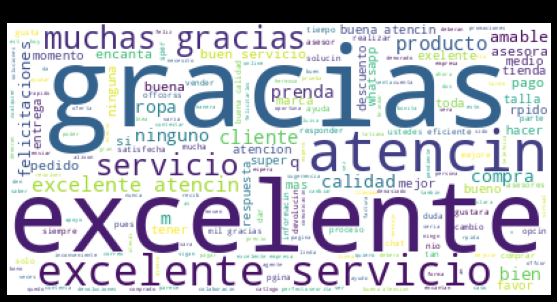

In [125]:
wordcloud(pd.DataFrame(OnlyGoodReviews_NPS_cl),var_NLP[1],idgraf=1)

[('excelente', 275),
 ('gracias', 244),
 ('servicio', 195),
 ('atencin', 182),
 ('muchas', 81),
 ('buena', 73),
 ('calidad', 53),
 ('productos', 47),
 ('ropa', 43),
 ('ninguno', 43)]

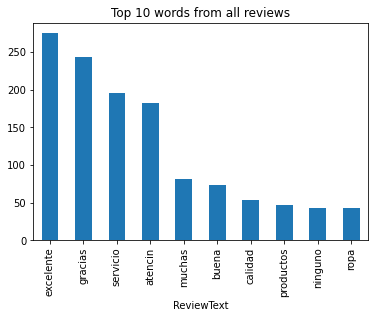

In [126]:
get_top_n_words(OnlyGoodReviews_NPS_cl,10,1)

**CLASIFICATION MODELS**

In [127]:

data_online = dfon.copy()
data_online['customertype2'] = data_online.customertype2
data_online['age'] = dfon.age.cat.codes
data_online['gender'] = dfon.gender.cat.codes
data_online['device'] = dfon.device.cat.codes
data_online['Intercept'] = 1

In [128]:
#X = dfon[['Intercept', 'satisfaction', 'repurchase_decision', 'age', 
#           'gender', 'device', 'availability_sizeandcolors', 'overallsatisfactionnavigation',
#           'overallpaymentprocess','overallsatisfactionreceivedproduct','PPURCHoverallsolution']]
X = data_online[['Intercept', 'satisfaction', 'repurchase_decision', 'age', 'gender']]
Y = data_online['customertype2']



In [129]:
dfon[['satisfaction', 'repurchase_decision', 'age', 'gender']].head()

satisfaction  repurchase_decision           age    gender
0             7                    8  36 a 45 años  Femenino
1             9                   10  26 a 35 años  Femenino
2             9                    9  36 a 45 años  Femenino
3             8                    6  36 a 45 años  Femenino
4             8                    6  36 a 45 años  Femenino

In [130]:
def reg_model(X,Y,model=-1):
    from sklearn.model_selection import train_test_split
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.tree import DecisionTreeClassifier
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle = True, test_size=0.2, random_state = 2)
    #print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
   
    if model == 1:
        knn = KNeighborsClassifier(n_neighbors=2)
        knn.fit(X_train, Y_train)
        
        # performing predictions on the test datdaset
        yhat = knn.predict_proba(X_test)[:,1]
        ypred = knn.predict(X_test)
        ytest = Y_test
        rl_summ = []
        
    elif model == 2:
        # Implementing Decision Tree Clasifier
        
        # Create Decision Tree classifer object
        clf_dt = DecisionTreeClassifier()

        # Train Decision Tree Classifer
        clf_dt =  clf_dt.fit(X_train, Y_train)
        
        # performing predictions on the test datdaset
        yhat = clf_dt.predict_proba(X_test)[:,1]
        ypred = clf_dt.predict(X_test)
        ytest = Y_test
        rl_summ = []
        
    elif model == 3:
        # Implementing Random Forest Clasifier
        clf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
        clf_rf = clf.fit(X_train, Y_train)
        
        # performing predictions on the test datdaset
        yhat = clf_rf.predict_proba(X_test)[:,1]
        ypred = clf_rf.predict(X_test)
        ytest = Y_test
        rl_summ = []
        
    else:       
        logit_model =  sm.Logit(Y_train,X_train)
        logit_fit = logit_model.fit()
   
        # performing predictions on the test datdaset
        yhat = logit_fit.predict(X_test)
        ypred = list(map(round, yhat))
        ytest = Y_test
        rl_summ = logit_fit.summary()
    # comparing original and predicted values of y
    #print('Acutal values', list(Y_test.values))
    #print('Predictions :', prediction)
    
    return rl_summ, yhat, ypred, ytest

In [131]:
def kpi_scores(y_test, y_hat, y_pred):
    from sklearn.metrics import (confusion_matrix, accuracy_score, f1_score, recall_score,
                                 precision_score, balanced_accuracy_score)
    from sklearn.metrics import roc_curve, auc
    from sklearn.model_selection import StratifiedKFold

    # metrics of the model
    # acc = balanced_accuracy_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    f1_ = f1_score(y_test, y_pred)
    rec_ = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    print('Test Accuracy = ', acc)
    print('Test F1-score = ', f1_)
    print('Test Recall = ', rec_)
    print('Test Precision = ', prec)
     
    plt.plot(acc,f1_,rec_,prec)    
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred) 
    print ("\nConfusion Matrix : \n", cm)    
    r = [f1_, rec_, prec, acc]
    
    # ROC Curve
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_hat)
    auc_lr = auc(fpr_lr, tpr_lr)
    
    plt.plot(fpr_lr, tpr_lr, label = 'AUC(baseline) = {:2.2f}'.format(auc_lr))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(fontsize = 12)
    plt.plot([0,1], [0,1], "r--")
    plt.title('ROC Curve -- Baseline Model')
    return r



Test Accuracy =  0.9620253164556962
Test F1-score =  0.9784172661870503
Test Recall =  1.0
Test Precision =  0.9577464788732394

Confusion Matrix : 
 [[ 8  3]
 [ 0 68]]


[0.9784172661870503, 1.0, 0.9577464788732394, 0.9620253164556962]

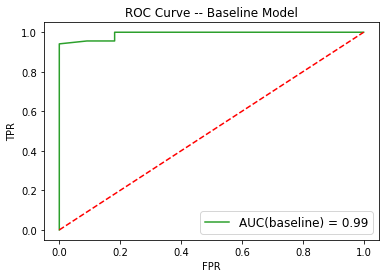

In [132]:
# Ingrese 0 para RL, 1 para KNN, 2 para DT y 3 para RF
rl_summary, Y_hat, Y_pred, Y_test = reg_model(X,Y,3)
#print(rl_summary)
kpi_scores(Y_test, Y_hat, Y_pred)

In [133]:
rl_summary, Y_hat, Y_pred, Y_test = reg_model(X,Y,0)
print(rl_summary)

Optimization terminated successfully.
         Current function value: 0.176773
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          customertype2   No. Observations:                  312
Model:                          Logit   Df Residuals:                      307
Method:                           MLE   Df Model:                            4
Date:                Wed, 01 Sep 2021   Pseudo R-squ.:                  0.6282
Time:                        00:21:25   Log-Likelihood:                -55.153
converged:                       True   LL-Null:                       -148.34
Covariance Type:            nonrobust   LLR p-value:                 3.185e-39
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -24.2593      3.589     -6.760      0.000     -31.293     -17.225
sa

Test Accuracy =  0.9620253164556962
Test F1-score =  0.9781021897810219
Test Recall =  0.9852941176470589
Test Precision =  0.9710144927536232

Confusion Matrix : 
 [[ 9  2]
 [ 1 67]]


[0.9781021897810219,
 0.9852941176470589,
 0.9710144927536232,
 0.9620253164556962]

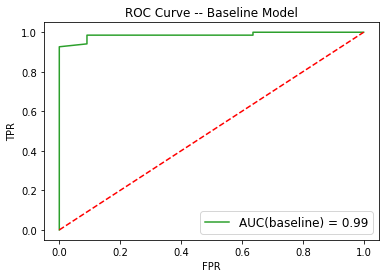

In [134]:
kpi_scores(Y_test, Y_hat, Y_pred)

In [135]:
rl_summary, Y_hat, Y_pred, Y_tes = reg_model(X,Y,1)

Test Accuracy =  0.8987341772151899
Test F1-score =  0.9384615384615386
Test Recall =  0.8970588235294118
Test Precision =  0.9838709677419355

Confusion Matrix : 
 [[10  1]
 [ 7 61]]


[0.9384615384615386,
 0.8970588235294118,
 0.9838709677419355,
 0.8987341772151899]

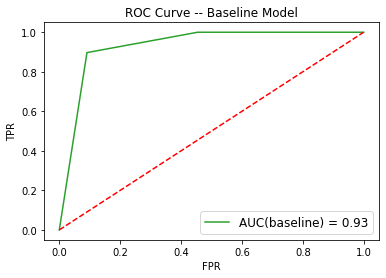

In [136]:
kpi_scores(Y_test, Y_hat, Y_pred)

In [137]:
rl_summary, Y_hat, Y_pred, Y_test = reg_model(X,Y,2)

Test Accuracy =  0.9493670886075949
Test F1-score =  0.9701492537313432
Test Recall =  0.9558823529411765
Test Precision =  0.9848484848484849

Confusion Matrix : 
 [[10  1]
 [ 3 65]]


[0.9701492537313432,
 0.9558823529411765,
 0.9848484848484849,
 0.9493670886075949]

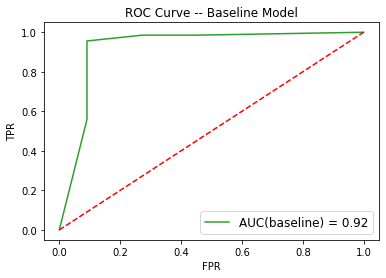

In [138]:
kpi_scores(Y_test, Y_hat, Y_pred)

In [139]:
rl_summary, Y_hat, Y_pred, Y_test = reg_model(X,Y,3)

Test Accuracy =  0.9620253164556962
Test F1-score =  0.9784172661870503
Test Recall =  1.0
Test Precision =  0.9577464788732394

Confusion Matrix : 
 [[ 8  3]
 [ 0 68]]


[0.9784172661870503, 1.0, 0.9577464788732394, 0.9620253164556962]

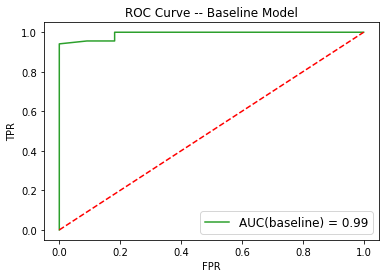

In [140]:
kpi_scores(Y_test, Y_hat, Y_pred)

In [141]:
def kpi_scores(y_test, y_hat, y_pred):
    from sklearn.metrics import (confusion_matrix, accuracy_score, f1_score, recall_score,
                                 precision_score, balanced_accuracy_score)
    from sklearn.metrics import roc_curve, auc
    from sklearn.model_selection import StratifiedKFold

    # metrics of the model
    # acc = balanced_accuracy_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    f1_ = f1_score(y_test, y_pred)
    rec_ = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)

    # confusion matrix
    cm = confusion_matrix(y_test, y_pred) 
    r = [f1_, rec_, prec, acc]
    
    # ROC Curve
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_hat)
    auc_lr = auc(fpr_lr, tpr_lr)
    
    return cm, f1_, rec_, prec, acc, fpr_lr, tpr_lr, auc_lr


def dataset(ds):
    if ds == 1:
        # Voicebots
        prep_voicebot = df_clean[['MES', 'queue_name', 'inconvenient_solved', 'repurchase_decision', 'overall_satisfaction', 'recommendation']].copy()
        data_voicebots = prep_voicebot.dropna()
        data_voicebots['MES'] = data_voicebots['MES'].astype('category').cat.codes
        data_voicebots['queue_name'] = data_voicebots['queue_name'].astype('category').cat.codes
        data_voicebots['inconvenient_solved'] = data_voicebots['inconvenient_solved'].astype('category').cat.codes
        data_voicebots['repurchase_decision'] = data_voicebots['repurchase_decision'].astype('category').cat.codes
        data_voicebots['overall_satisfaction'] = data_voicebots['overall_satisfaction'].astype('category').cat.codes

        Y_ds = data_voicebots['recommendation'].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 0, 0, 0, 0, 0, 0, 0, 1, 1])
        X_ds = data_voicebots[['MES', 'queue_name', 'inconvenient_solved', 'repurchase_decision', 'overall_satisfaction']]
 
    elif ds == 2:
        # Outlets
        data_outlets = df_outlets.copy()
        data_outlets['AGE'] = data_outlets['AGE'].astype('category').cat.codes
        data_outlets['GENDER'] = data_outlets['GENDER'].astype('category').cat.codes
        data_outlets['CITY'] = data_outlets['CITY'].astype('category').cat.codes
        data_outlets['TOWHOM'] = data_outlets['TOWHOM'].astype('category').cat.codes

        Y_ds = data_outlets["RECOMMEND_OFF"].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])
        X_ds = data_outlets[['GENERAL_SATISFACTION_OUTLETS', 'CITY', 'AGE', 'GENDER', 'TOWHOM']]
        
    elif ds == 3:     
        # Physical store
        data_p_store = p_store_clean.copy()
        data_p_store['age'] = data_p_store['age'].astype('category').cat.codes
        data_p_store['gender'] = data_p_store['gender'].astype('category').cat.codes
        data_p_store['city'] = data_p_store['city'].astype('category').cat.codes
        data_p_store['to_whom'] = data_p_store['to_whom'].astype('category').cat.codes

        Y_ds = data_p_store['Overal_recommendation'].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])
        X_ds = data_p_store[['Overal_satisfaction', 'city', 'age', 'gender', 'to_whom']]
    
    else:
        # Online
        data_online = dfon.copy()
        data_online['customertype2'] = data_online.customertype2
        data_online['age'] = dfon.age.cat.codes
        data_online['gender'] = dfon.gender.cat.codes
        data_online['device'] = dfon.device.cat.codes
        
        Y_ds = data_online['customertype2']
        X_ds= data_online[['satisfaction', 'repurchase_decision', 'age', 'gender']]
        
    return X_ds, Y_ds

Text(0.5, 1.0, 'ROC Curve -- Baseline Model')

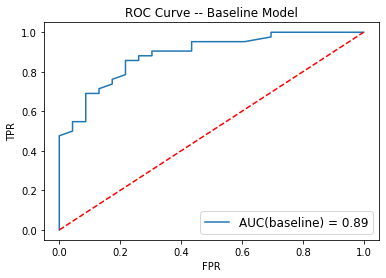

In [142]:
def kpi_scores(y_test, y_hat, y_pred):
    from sklearn.metrics import (confusion_matrix, accuracy_score, f1_score, recall_score,
                                 precision_score, balanced_accuracy_score)
    from sklearn.metrics import roc_curve, auc
    from sklearn.model_selection import StratifiedKFold

    # metrics of the model
    # acc = balanced_accuracy_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    f1_ = f1_score(y_test, y_pred)
    rec_ = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)

    # confusion matrix
    cm = confusion_matrix(y_test, y_pred) 
    r = [f1_, rec_, prec, acc]
    
    # ROC Curve
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_hat)
    auc_lr = auc(fpr_lr, tpr_lr)
    
    return cm, f1_, rec_, prec, acc, fpr_lr, tpr_lr, auc_lr


# Ingrese 0 para Online, 1 para Outlet, 2 para P_Store y 3 para Voicebot
X, Y = dataset(3)

# Ingrese 0 para RL, 1 para KNN, 2 para DT y 3 para RF
rl_summary, Y_hat, Y_pred, Y_test = reg_model(X,Y,3)
cm, f1_, rec_, prec, acc, fpr_lr, tpr_lr, auc_lr = kpi_scores(Y_test, Y_hat, Y_pred)

#print(rl_summary)
#print('Test Accuracy = ', acc)
#print('Test F1-score = ', f1_)
#print('Test Recall = ', rec_)
#print('Test Precision = ', prec)
#print ("\nConfusion Matrix : \n", cm)

#print ("\nROC curve: \n")
plt.plot(fpr_lr, tpr_lr, label = 'AUC(baseline) = {:2.2f}'.format(auc_lr))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(fontsize = 12)
plt.plot([0,1], [0,1], "r--")
plt.title('ROC Curve -- Baseline Model')

In [143]:
# calculate probability between 0-1 to become a promoter performing the logistic regression 
def rec_prob(entrada, model=-1):
    import math
    conversion = pd.DataFrame()

    if model == 1: # Voicebots
        # mes: "febrero","marzo"
        # canal: "-", "CHAT-COBRANZAS","CHAT-SAC","CHAT-VENTAS"
        # inconvenient solved: 0-1
        # repurchase_decision: 0-9
        # overall_satisfaction: 0-9
        conversion["category"] = ["febrero","marzo",
                                  "-", "CHAT-COBRANZAS","CHAT-SAC","CHAT-VENTAS"] 
        conversion["unit"] = [0,1,
                              0,1,2,3]
        i_1 = conversion[conversion["category"]==entrada[0]]["unit"].values.tolist()[0]
        i_2 = conversion[conversion["category"]==entrada[1]]["unit"].values.tolist()[0]
        c = [i_1, i_2,entrada[2],entrada[3],entrada[4],1]
        # [Mes, queue_name, inconvenient solved, repurchase_decision, overall_satisfaction, Intercept]
        w = [0.1439, 0.2253, -0.0097, 0.6752, 0.3396, -6.1150] # pesos voicebots 
    elif model == 2: # Outlets
        # GENERAL_SATISFACTION_OUTLETS: 1-10
        # CITY: "Barranquilla", "Bogota", "Boyaca", "Cali", "Medellin", "Otros", "Pasto", "Villavicencio"
        # AGE: "18 - 25","26 - 35", "36 - 45", "46 - 55","56 - 65"
        # GENDER: "Femenino", "Masculino"
        # TOWHOM: "Conocidos","Familiares", "Hijos", "Nietos", "Sobrinos"
        
        conversion["category"] = ["18 - 25","26 - 35", "36 - 45", "46 - 55","56 - 65",
                                      "Femenino", "Masculino",
                                      "Barranquilla", "Bogota", "Boyaca", "Cali", "Medellin", "Otros", "Pasto", "Villavicencio",
                                      "Conocidos","Familiares", "Hijos", "Nietos", "Sobrinos"] 
        conversion["unit"] = [0,1,2,3,4,
                                  0,1,
                                  0,1,2,4,5,6,7,8,
                                  0,1,2,3,4]
        i_1 = conversion[conversion["category"]==entrada[1]]["unit"].values.tolist()[0]
        i_2 = conversion[conversion["category"]==entrada[2]]["unit"].values.tolist()[0]
        i_3 = conversion[conversion["category"]==entrada[3]]["unit"].values.tolist()[0]
        i_4 = conversion[conversion["category"]==entrada[4]]["unit"].values.tolist()[0]
        c = [entrada[0],i_1, i_2, i_3, i_4,1]
        # ["GENERAL_SATISFACTION_OUTLETS", "CITY", "AGE", "GENDER", "TOWHOM", "Intercept"]
        w = [1.2678, 0.1628, 0.2472, -0.5850, 0.0336, -10.4171] # pesos Outlets
    elif model == 3: # Physical stores
        # Overal_satisfaction: 1-10
        # city: "Barranquilla", "Bogota","Cali", "Cartagena", "Medellin", "Otros", "Santander","Villavicencio"
        # age: "18 - 25", "26 - 35", "36 - 45", "46 - 55", "56 - 65", "> 66 "
        # gender: "Femenino", "Masculino"
        # to_whom: "Familiares", "Hijos", "Nietos","Otros", "Sobrinos"
        
        conversion["category"] = ["18 - 25", "26 - 35", "36 - 45", "46 - 55", "56 - 65", "> 66 ", 
                             "Femenino", "Masculino", 
                             "Barranquilla", "Bogota","Cali", "Cartagena", "Medellin", "Otros", "Santander","Villavicencio",
                             "Familiares", "Hijos", "Nietos","Otros", "Sobrinos"]
        conversion["unit"] = [0,1,2,3,4,5,
                         0,1,
                         0,1,2,3,4,5,6,7,
                         0,1,2,3,4]
        i_1 = conversion[conversion["category"]==entrada[1]]["unit"].values.tolist()[0]
        i_2 = conversion[conversion["category"]==entrada[2]]["unit"].values.tolist()[0]
        i_3 = conversion[conversion["category"]==entrada[3]]["unit"].values.tolist()[0]
        i_4 = conversion[conversion["category"]==entrada[4]]["unit"].values.tolist()[0]
        c = [entrada[0],i_1, i_2, i_3, i_4,1]
        # ["Overal_satisfaction", "city", "age", "gender", "to_whom", "Intercept"]
        w = [1.3239, -0.2521, 0.3030, 0.3658, -0.1592, -9.4274] # physical store
    else: # Online
        # satisfaction: 1-10
        # repurchase_decision: 1-10
        # age: "18 - 25", "26 - 35", "36 - 45", "46 - 55", "56 - 65"
        # gender: "Femenino", "Masculino"
        
        conversion["category"] = ["18 - 25", "26 - 35", "36 - 45", "46 - 55", "56 - 65", 
                             "Femenino", "Masculino", 
                             "Celular", "Celular, Computador", "Celular, Tablet", "Computador", "Tablet"]
        conversion["unit"] = [0,1,2,3,4,
                         0,1,
                         0,1,2,3,4]
        i_1 = conversion[conversion["category"]==entrada[2]]["unit"].values.tolist()[0]
        i_2 = conversion[conversion["category"]==entrada[3]]["unit"].values.tolist()[0]

        c = [entrada[0],entrada[1], i_1, i_2, 1]
        # ["satisfaction", "repurchase_decision", "age", "gender", "Intercept"]
        w = [1.8940, 1.1082, -0.0966, -0.1889, -24.2593] # pesos

    r = np.dot(w, c)
    p = math.exp(r)/(1+math.exp(r))
    return p

In [144]:
# set test inputs
entrada_vb = ["marzo", "CHAT-COBRANZAS",1,9,9]
entrada_out = [9, "Bogota", "26 - 35", "Femenino", "Hijos"]
entrada_ps = [9, "Bogota", "26 - 35", "Femenino", "Hijos"]
entrada_on = [10, 10, "26 - 35", "Femenino"]
# Ingrese 0 para Online, 1 para Voicebot, 2 para Outlet y 3 para P_Store
print("Probabilidad de ser promotor: ", np.round(rec_prob(entrada_on, 0)*100,2), "%")

Probabilidad de ser promotor:  99.66 %
